# Temperature Forecast Project using ML

## Adeeb Naiyer

## Batch DS2402

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
 
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
 
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
 
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
 
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
    
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
 
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
 
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
 
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
 
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
 
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
 
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
 
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
 
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
 
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
    
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
 
19. lat - Latitude (Â°): 37.456 to 37.645
 
20. lon - Longitude (Â°): 126.826 to 127.135
    
21. DEM - Elevation (m): 12.4 to 212.3
 
22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
 
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
 
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

# Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Retrive the dataset using the raw address
url = "https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv"
df = pd.read_csv(url)

# 1. EDA

In [3]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [5]:
# checking the dimension of the dataset
df.shape

(7752, 25)

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Data set contains 7752 rows and 25 columns.  Next_Tmax, Next_Tmin are considered as the targets. Since both are continous and numeric variable both are considered as regression problem

In [7]:
# Types of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


## Missing values

In [8]:
# checking the null values
miss_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
miss_val["% of missing"] = round(miss_val['Null values'] / len(df) * 100,2)

miss_val

Null values  % of missing
station                     2          0.03
Date                        2          0.03
Present_Tmax               70          0.90
Present_Tmin               70          0.90
LDAPS_RHmin                75          0.97
LDAPS_RHmax                75          0.97
LDAPS_Tmax_lapse           75          0.97
LDAPS_Tmin_lapse           75          0.97
LDAPS_WS                   75          0.97
LDAPS_LH                   75          0.97
LDAPS_CC1                  75          0.97
LDAPS_CC2                  75          0.97
LDAPS_CC3                  75          0.97
LDAPS_CC4                  75          0.97
LDAPS_PPT1                 75          0.97
LDAPS_PPT2                 75          0.97
LDAPS_PPT3                 75          0.97
LDAPS_PPT4                 75          0.97
lat                         0          0.00
lon                         0          0.00
DEM                         0          0.00
Slope                       0          0.00
Solar radiation             0          0.00
Next_Tmax                  27          0.35
Next_Tmin                  27          0.35

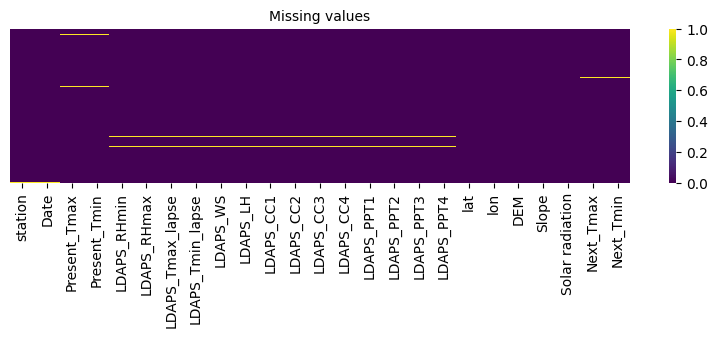

In [9]:
# Let's visualize it using heatmap
plt.figure(figsize=(10,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing values', fontsize=10);

## Feature analysis

In [10]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

No. of unique values     type
station                             25  float64
Date                               310   object
Present_Tmax                       167  float64
Present_Tmin                       155  float64
LDAPS_RHmin                       7672  float64
LDAPS_RHmax                       7664  float64
LDAPS_Tmax_lapse                  7675  float64
LDAPS_Tmin_lapse                  7675  float64
LDAPS_WS                          7675  float64
LDAPS_LH                          7675  float64
LDAPS_CC1                         7569  float64
LDAPS_CC2                         7582  float64
LDAPS_CC3                         7599  float64
LDAPS_CC4                         7524  float64
LDAPS_PPT1                        2812  float64
LDAPS_PPT2                        2510  float64
LDAPS_PPT3                        2356  float64
LDAPS_PPT4                        1918  float64
lat                                 12  float64
lon                                 25  float64
DEM                                 25  float64
Slope                               27  float64
Solar radiation                   1575  float64
Next_Tmax                          183  float64
Next_Tmin                          157  float64

### Observation:

• Next_Tmax and Next_Tmin are the target values which are both numerical and continous so theses are considered as regression problems

• The date colunm will be converted to Data time format

• station(25), lat(12), lon(25), DEM(25), and Slope(27) columns, despite being numerical, seem to be categorical

### Next_Tmax unique values

In [11]:
# Inspect the unique values of the target variable
column = ['Next_Tmax','Next_Tmin']
for i in column:
    print(f"Feature {i}:\n{df[i].value_counts()}")
    print(f"Unique values: {sorted(df[i].unique())}")
    print(f"# unique values: {df[i].nunique()}\n")

Feature Next_Tmax:
Next_Tmax
29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.9      1
38.3      1
37.6      1
37.4      1
21.5      1
Name: count, Length: 183, dtype: int64
Unique values: [21.6, 21.8, 22.4, 22.5, 22.8, 23.0, 23.1, 23.2, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.7, 34.8, nan, 17.4, 18.6, 18.9, 19.5, 19.7, 20.1, 20.3, 20.4,

### Date unique values

In [12]:
# Inspect the unique values of the Date variable
column = 'Date'
print(f"Feature {column}:\n{df[column].value_counts()}")

Feature Date:
Date
30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: count, Length: 310, dtype: int64


We will convert date into date time format

In [13]:
# convert the Date column into date
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

#### Separating numerical and categorical columns

In [15]:
cat_col = ['station', 'lat', 'lon', 'DEM', 'Slope']
not_num_col = cat_col + ['Date', 'Next_Tmax', 'Next_Tmin']
num_col = [col for col in df.columns if col not in not_num_col]

print(f"Numerical columns as categories: \n{cat_col}\n")
print(f"Not numerical column: \n{not_num_col}\n")
print(f"Numerical columns: \n{num_col}")

Numerical columns as categories: 
['station', 'lat', 'lon', 'DEM', 'Slope']

Not numerical column: 
['station', 'lat', 'lon', 'DEM', 'Slope', 'Date', 'Next_Tmax', 'Next_Tmin']

Numerical columns: 
['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation']


In [16]:
## categorical column

for column in cat_col:
    print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature station:
station
1.0     310
2.0     310
25.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
14.0    310
13.0    310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
NaN       2
Name: count, dtype: int64
# unique values: 25

Feature lat:
lat
37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
37.4967     620
37.5372     620
37.6181     620
37.5237     620
37.6450     311
37.4562     311
37.4832     310
Name: count, dtype: int64
# unique values: 12

Feature lon:
lon
127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
126.891    310
127.086    310
127.040    310
127.004    310
126.938    310
127.024    310
127.099    310
126.995    310
127.083    310
126.927    310
127.032    310
126.988    310
127.085    310
126.955    310
126.910    310
126.838    310
127.042    310
127.022    31

In [17]:
## Numerical columns

for column in num_col:
    print(f"Feature {column}:\n{df[column].value_counts()}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature Present_Tmax:
Present_Tmax
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: count, Length: 167, dtype: int64
# unique values: 167

Feature Present_Tmin:
Present_Tmin
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: count, Length: 155, dtype: int64
# unique values: 155

Feature LDAPS_RHmin:
LDAPS_RHmin
19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
            ..
52.924568    1
60.215191    1
46.799820    1
52.227486    1
22.933014    1
Name: count, Length: 7672, dtype: int64
# unique values: 7672

Feature LDAPS_RHmax:
LDAPS_RHmax
96.525200     2
99.251968     2
100.000153    2
91.878174     2
94.795967     2
             ..
96.718201     1
94.153252     1
96.910126     1
93.541885     1
77.243744     1
Name: count, Length: 7664, dtype: int64
# unique values: 7664

Feature LDA

### Imputing missing values

In [18]:
miss_val

Null values  % of missing
station                     2          0.03
Date                        2          0.03
Present_Tmax               70          0.90
Present_Tmin               70          0.90
LDAPS_RHmin                75          0.97
LDAPS_RHmax                75          0.97
LDAPS_Tmax_lapse           75          0.97
LDAPS_Tmin_lapse           75          0.97
LDAPS_WS                   75          0.97
LDAPS_LH                   75          0.97
LDAPS_CC1                  75          0.97
LDAPS_CC2                  75          0.97
LDAPS_CC3                  75          0.97
LDAPS_CC4                  75          0.97
LDAPS_PPT1                 75          0.97
LDAPS_PPT2                 75          0.97
LDAPS_PPT3                 75          0.97
LDAPS_PPT4                 75          0.97
lat                         0          0.00
lon                         0          0.00
DEM                         0          0.00
Slope                       0          0.00
Solar radiation             0          0.00
Next_Tmax                  27          0.35
Next_Tmin                  27          0.35

In [19]:
cols_with_missing = miss_val[miss_val['Null values'] > 0].index.to_list()
cols_with_missing

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'Next_Tmax',
 'Next_Tmin']

In [20]:
# Dropping the missing values with % of missing less than 5%
df_new = df.dropna(subset=cols_with_missing)

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

164 rows with missing values were deleted.
This represent 2.12% of the data.
In the new dataset there are 7588 rows and 25 columns.


In [21]:
df.isnull().sum().sum()

0

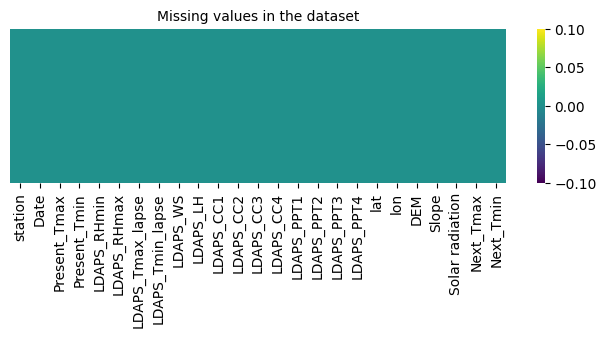

In [22]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing values in the dataset', fontsize=10);

In [23]:
df.shape

(7588, 25)

In [24]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

## Statisticcal summary

In [25]:
# Summary statistics of numerical columns
df_numeric = df.select_dtypes(exclude=['datetime64[ns]'])
stats = df_numeric.describe()
stats

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [26]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

Date
count                           7588
mean   2015-07-27 18:22:12.208750592
min              2013-06-30 00:00:00
25%              2014-07-15 00:00:00
50%              2015-07-29 00:00:00
75%              2016-08-14 00:00:00
max              2017-08-30 00:00:00

## Observation

• Theere are on missing negative values

• Next we will analyse the mean and median difference along with outliers analysing

### Skewness calculation

In [27]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

DEM                 16.202136
LDAPS_LH             5.594282
LDAPS_RHmin          1.701770
Slope                0.641755
LDAPS_PPT1           0.589008
LDAPS_WS             0.546259
LDAPS_PPT2           0.480738
LDAPS_PPT3           0.275007
LDAPS_PPT4           0.265373
LDAPS_CC4            0.070808
LDAPS_CC3            0.055751
LDAPS_CC1            0.052804
LDAPS_CC2            0.043852
station              0.014101
lon                 -0.003580
lat                 -0.005908
LDAPS_Tmax_lapse    -0.089409
Present_Tmax        -0.151634
Next_Tmax           -0.158474
Next_Tmin           -0.189180
Present_Tmin        -0.204191
LDAPS_Tmin_lapse    -0.246463
LDAPS_RHmax         -1.423299
Solar radiation    -98.263097
dtype: float64

In the columns  DEM, LDAPS_LH, LDAPS_RHmin the mean is greater than the median, hence the data is skewed towards the right

In the columns Solar radiation and LDAPS_RHmax, median is greater than the mean so the data is left skewed

### Outliers calculation

In [28]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

LDAPS_LH             83.549084
DEM                  41.769806
LDAPS_PPT1           19.257383
LDAPS_PPT2           17.654268
LDAPS_PPT4           14.030775
LDAPS_PPT3           13.274055
LDAPS_RHmin          12.546648
LDAPS_WS             10.409457
LDAPS_Tmax_lapse      3.035135
Next_Tmax             2.434860
Next_Tmin             1.924669
Present_Tmax          1.916833
Present_Tmin          1.902431
LDAPS_Tmin_lapse      1.422399
Slope                 1.172949
LDAPS_CC4             0.169658
LDAPS_CC3             0.166577
LDAPS_CC2             0.096982
LDAPS_CC1             0.074248
lat                  -0.000649
lon                  -0.014859
station              -2.449816
LDAPS_RHmax          -2.759583
Solar radiation    -210.393335
dtype: float64

Since there are positive values there might be outliers in the data

## Data Visualisation

### Univariate analysis

#### Target variables

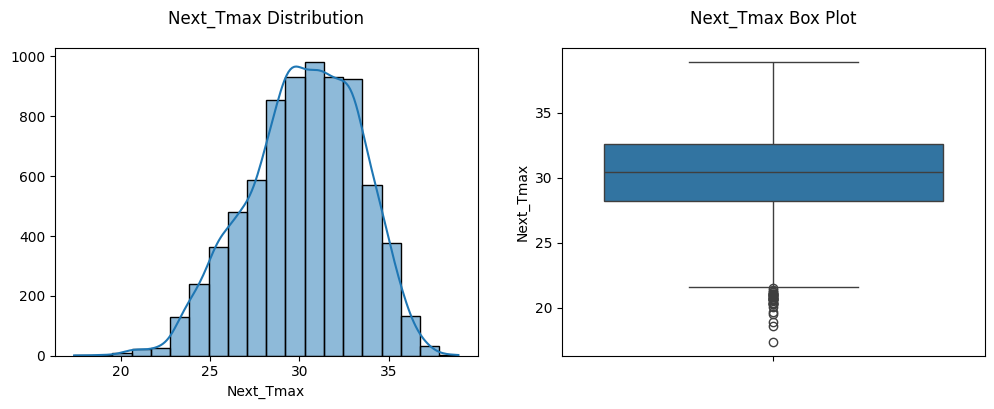

Skewness of Next_Tmax : -0.3348416351390219


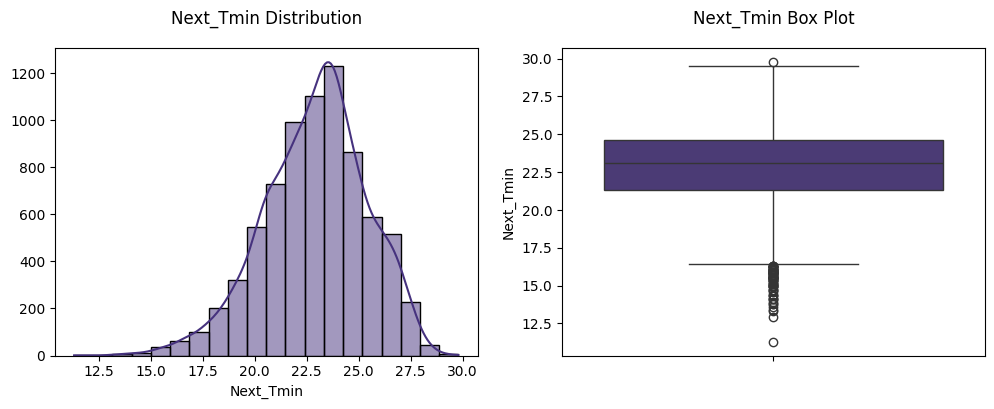

Skewness of Next_Tmin : -0.3936624459457225


In [29]:
target=['Next_Tmax', 'Next_Tmin']
for col in target:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.set_palette('viridis')
    sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
    sns.boxplot(df[col], ax=axes[1])

    axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
    axes[0].set_ylabel('', size=10, labelpad=8)
    
    axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

    plt.show()

    # Show the skewness 
    print(f"Skewness of {col} : {df[col].skew()}")

Analysing bothe the graphs we can say there are outliers in the target columns and also the data is not normally distributed

#### Categorical columns

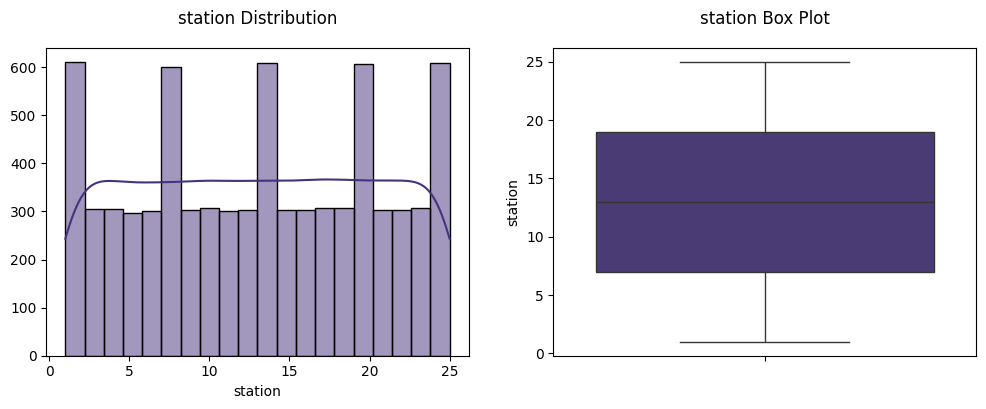

Skewness of station : -0.004177859024526559


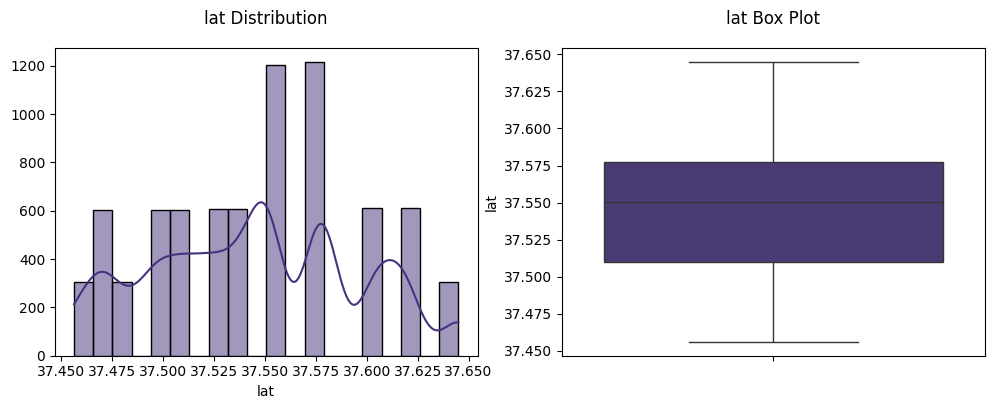

Skewness of lat : 0.08537672617082039


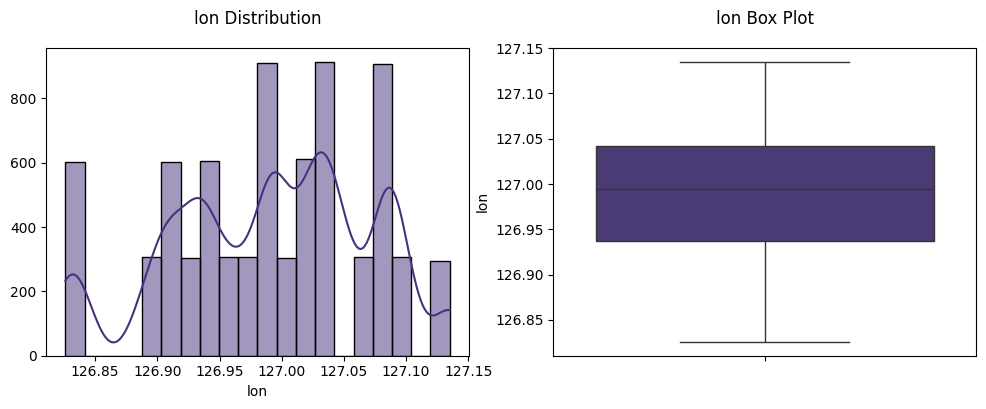

Skewness of lon : -0.28904839237055413


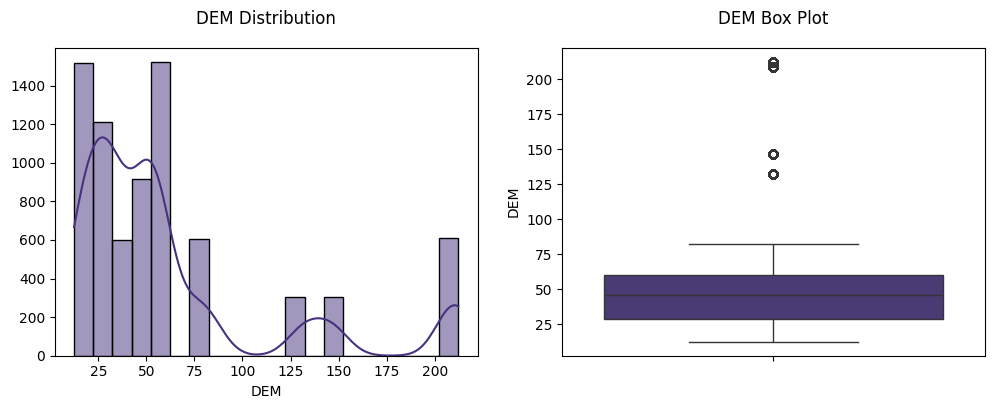

Skewness of DEM : 1.7216166816077285


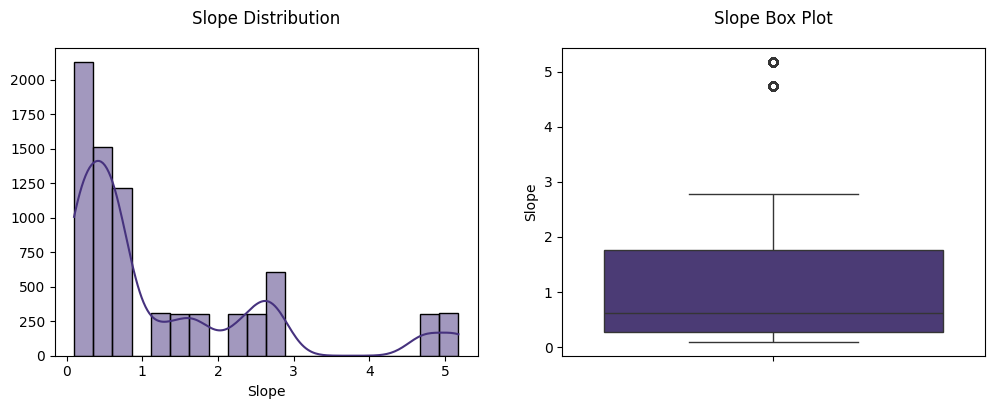

Skewness of Slope : 1.5590502641157087


In [30]:
for col in cat_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.set_palette('viridis')
    sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
    sns.boxplot(df[col], ax=axes[1])

    axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
    axes[0].set_ylabel('', size=10, labelpad=8)
    
    axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

    plt.show()

    # Show the skewness 
    print(f"Skewness of {col} : {df[col].skew()}")

### Observation:

station: normal distribution

lat: normal distribution

lon: normal distribution

DEM: Skewed to right, outliers present

Slope: skewed to wards right, outliers present

#### Numerical columns

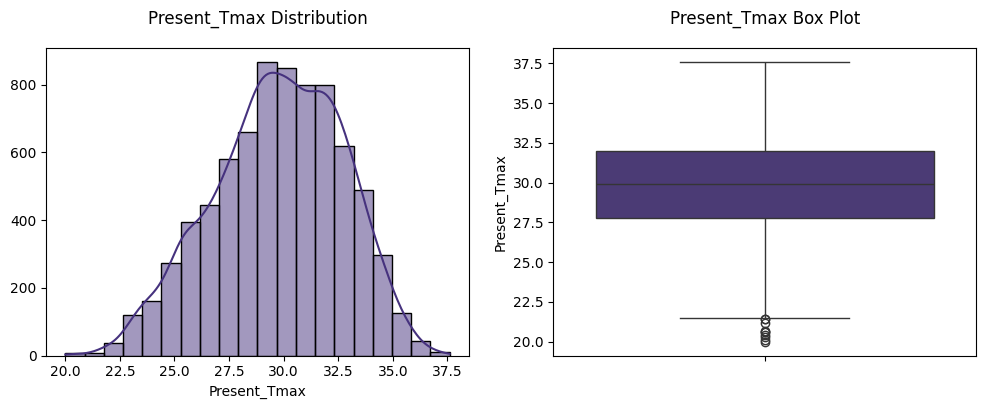

Skewness of Present_Tmax : -0.25706886624626474


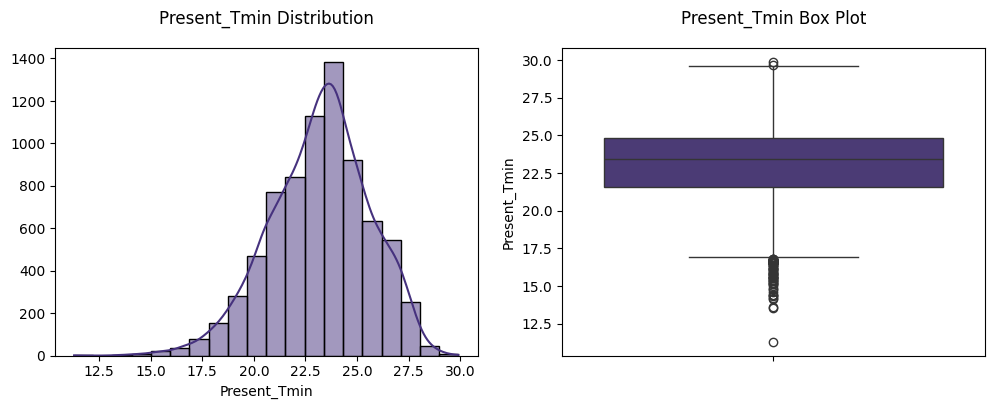

Skewness of Present_Tmin : -0.3538218967241725


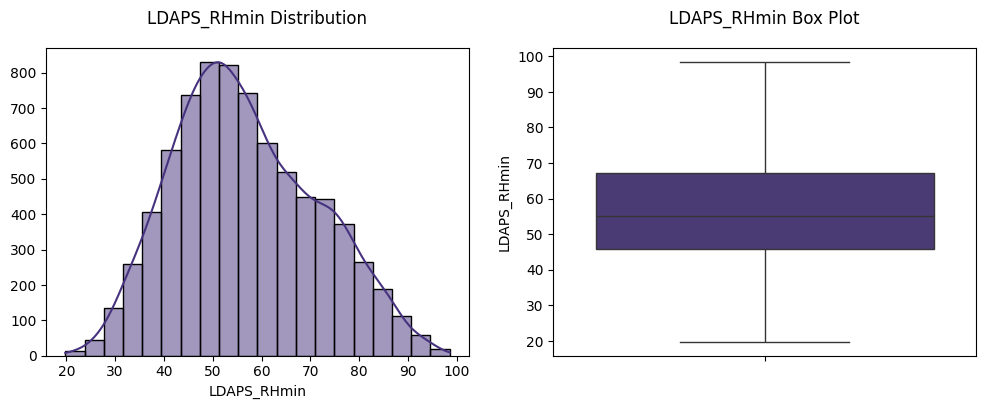

Skewness of LDAPS_RHmin : 0.30139555867014534


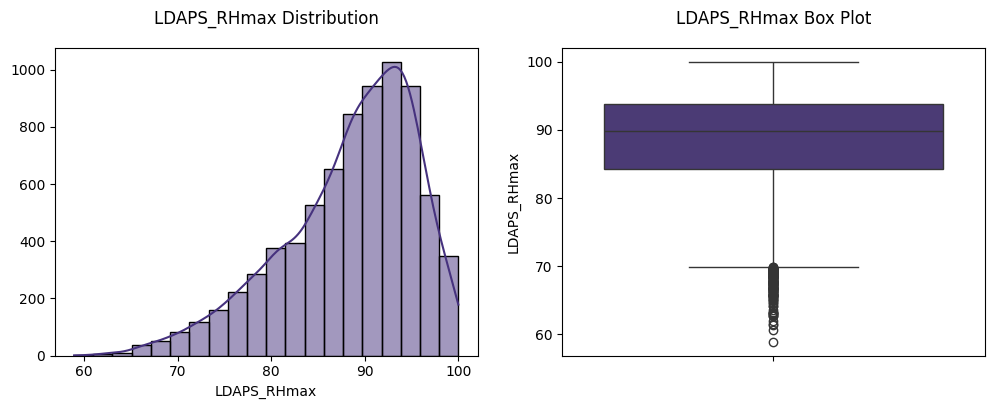

Skewness of LDAPS_RHmax : -0.8452636249574039


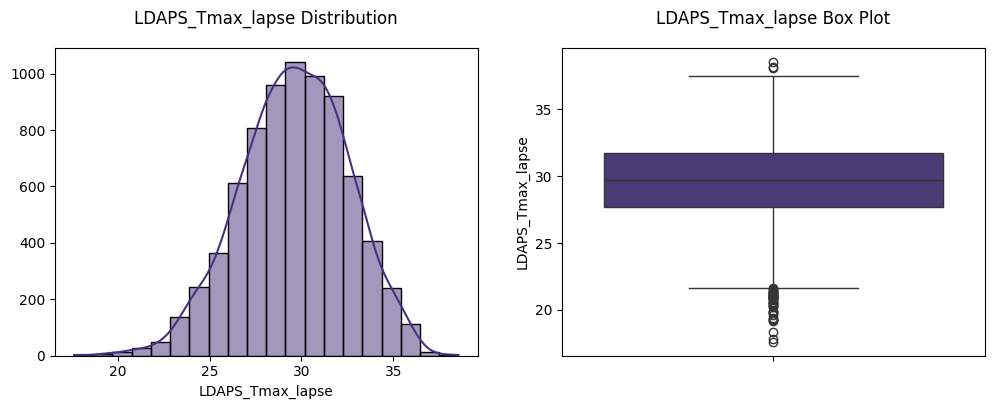

Skewness of LDAPS_Tmax_lapse : -0.22234900075307953


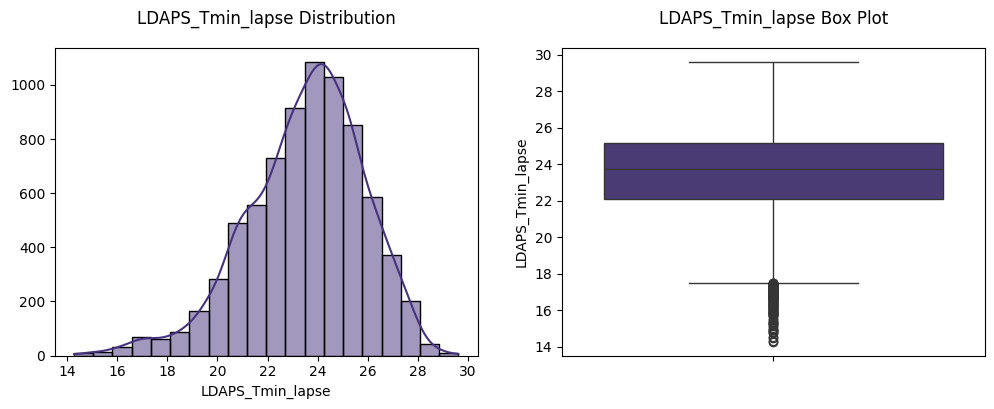

Skewness of LDAPS_Tmin_lapse : -0.5740346797849039


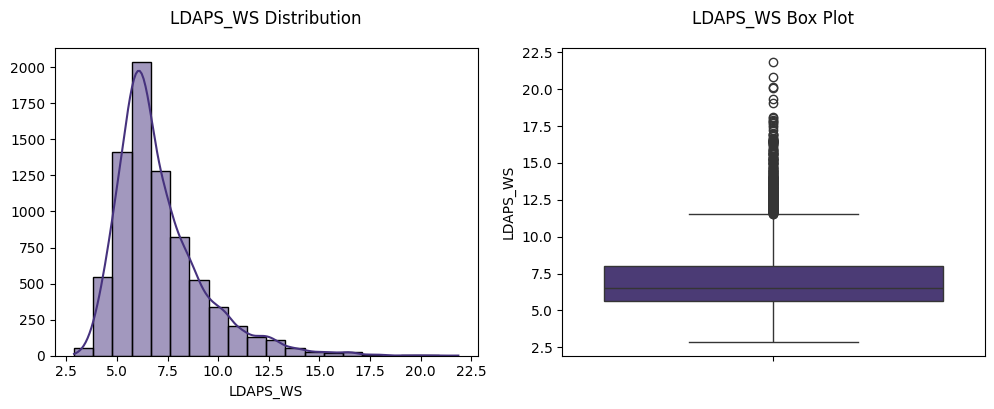

Skewness of LDAPS_WS : 1.5539261125674748


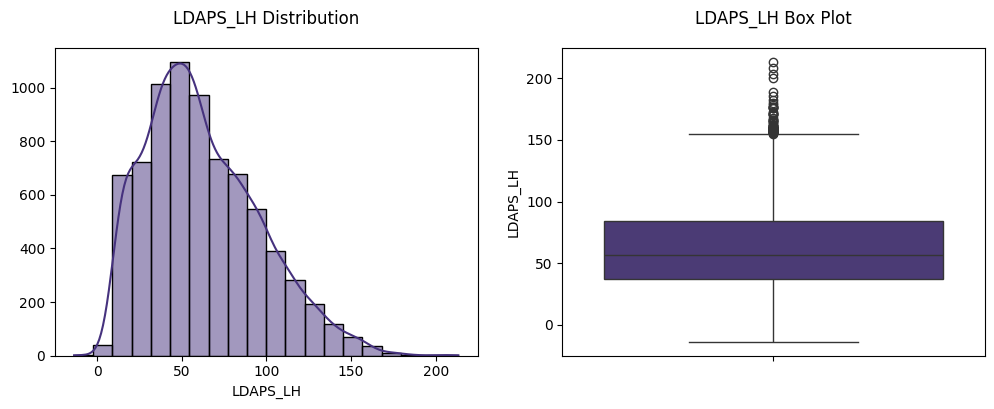

Skewness of LDAPS_LH : 0.6629705787700664


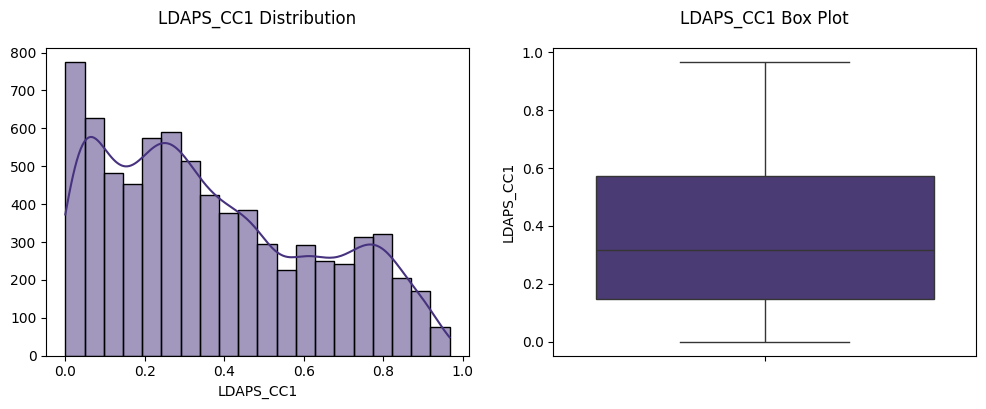

Skewness of LDAPS_CC1 : 0.4567158382781983


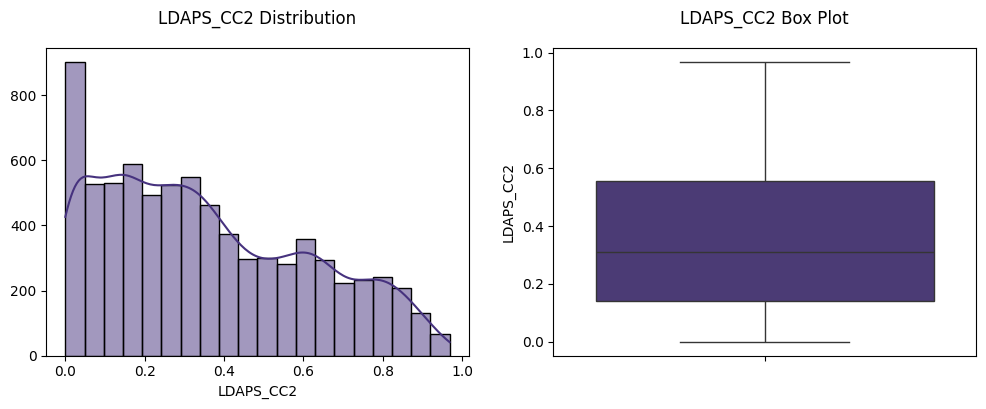

Skewness of LDAPS_CC2 : 0.4739293093576641


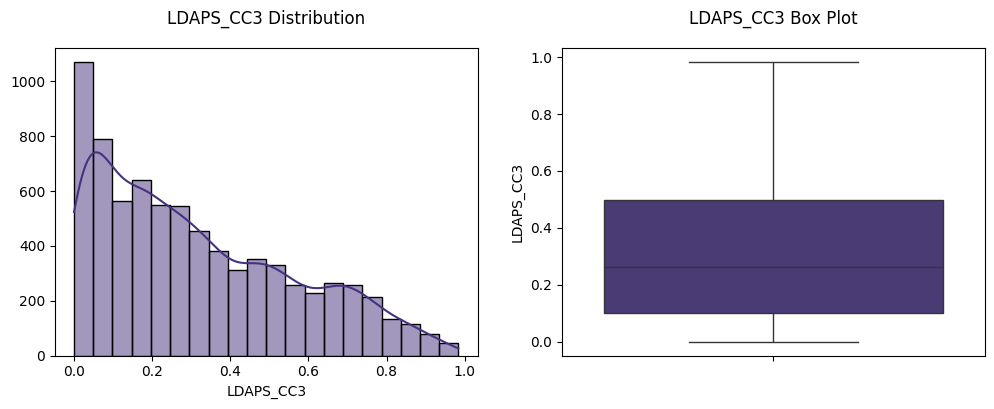

Skewness of LDAPS_CC3 : 0.6396492372098013


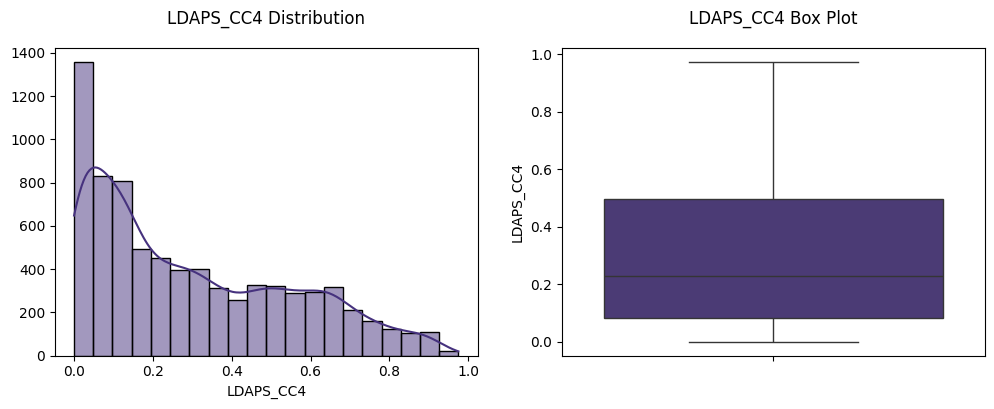

Skewness of LDAPS_CC4 : 0.6638153419746528


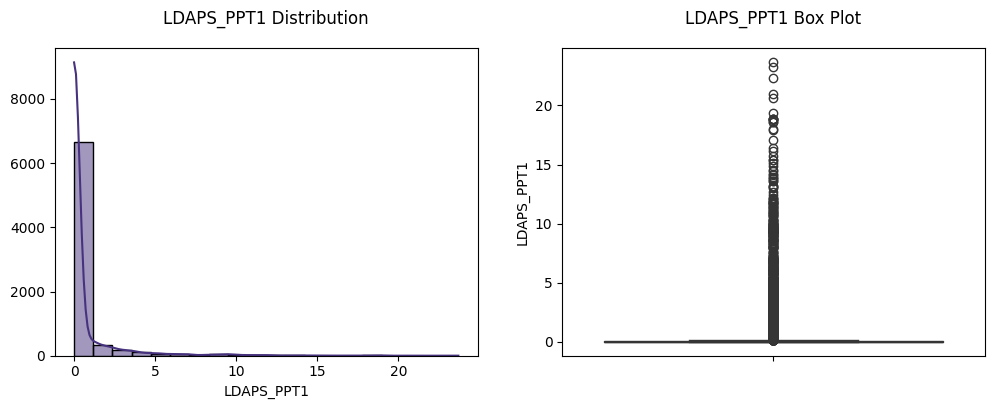

Skewness of LDAPS_PPT1 : 5.3059059957975325


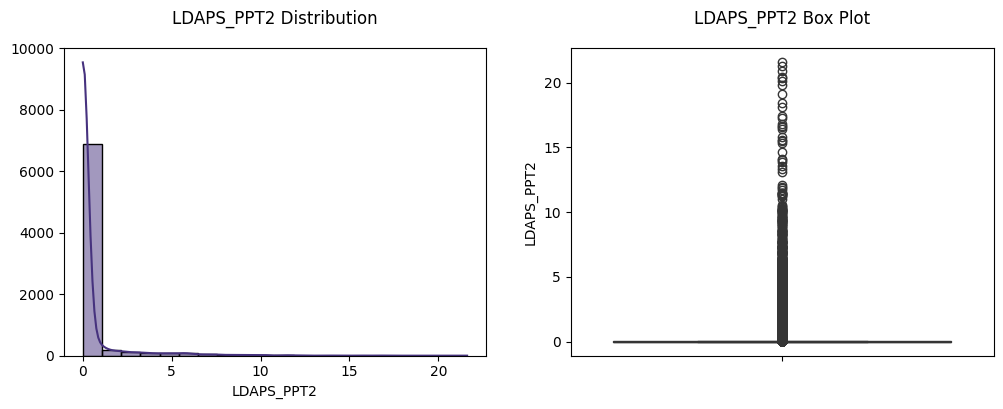

Skewness of LDAPS_PPT2 : 5.710360098053624


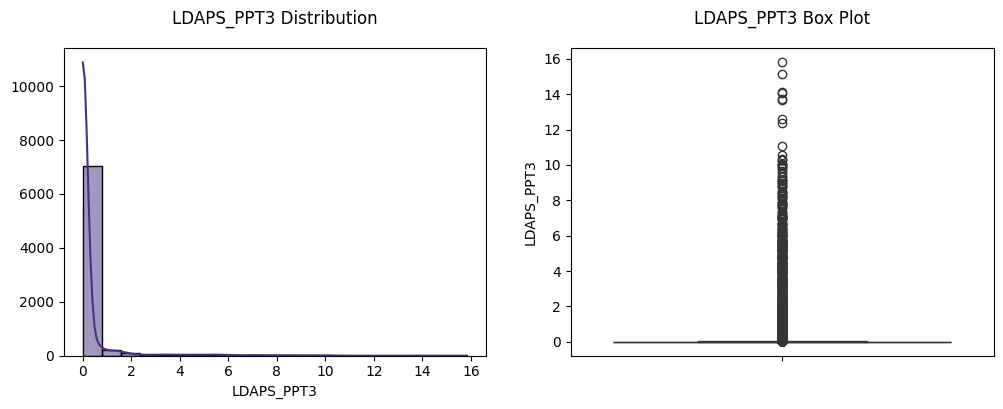

Skewness of LDAPS_PPT3 : 6.356670451431369


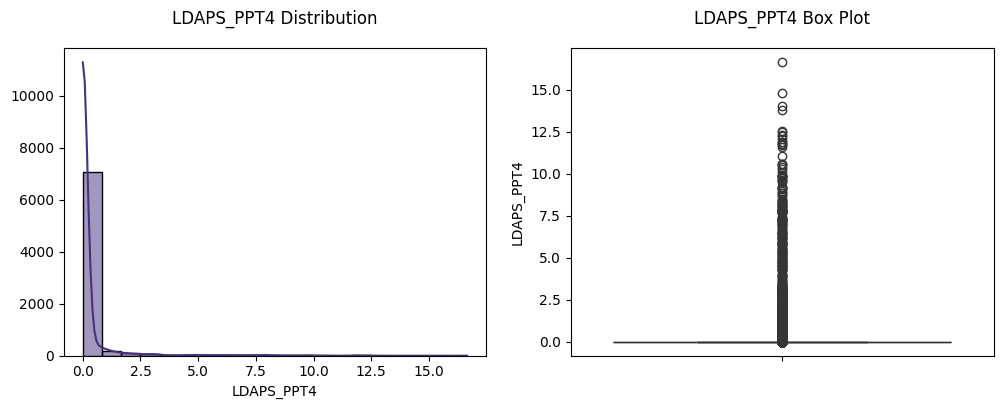

Skewness of LDAPS_PPT4 : 6.6812557353191435


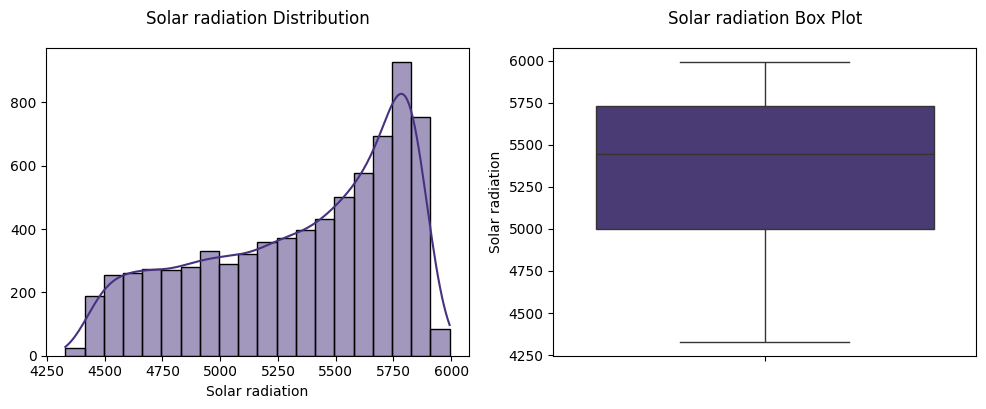

Skewness of Solar radiation : -0.5243245791911233


In [31]:
for col in num_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.set_palette('viridis')
    sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
    sns.boxplot(df[col], ax=axes[1])

    axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
    axes[0].set_ylabel('', size=10, labelpad=8)
    
    axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

    plt.show()

    # Show the skewness 
    print(f"Skewness of {col} : {df[col].skew()}")

Present_Tmax: slightly left skewed and outliers present

Present_Tmin: slightly left skewed and outliers present

LDAPS_RHmin: slightly skewed right and no outliers present

LDAPS_RHmax: left skewed and outliers present

LDAPS_Tmax_lapse: left skewed and outliers present

LDAPS_Tmin_lapse: left skewed and outliers present

LDAPS_WS: right skewed and outliers present

LDAPS_LH:skewed to the right. There are outliers present in the Box plot.

LDAPS_CC1: skewed to the right. There are NO outliers present in the Box plot.

LDAPS_CC2: skewed to the right. There are NO outliers present in the Box plot.

LDAPS_CC3: skewed to the right. There are NO outliers present in the Box plot.

LDAPS_CC4: skewed to the right. There are NO outliers present in the Box plot.

LDAPS_PPT1: skewed to the right. There are outliers present in the Box plot.

LDAPS_PPT2: skewed to the right. There are outliers present in the Box plot.

LDAPS_PPT3: skewed to the right. There are outliers present in the Box plot.

LDAPS_PPT4: skewed to the right. There are outliers present in the Box plot.

Solar radiation: skewed to the left. There are NO outliers present in the Box plot.

## Bivariate analysis

#### Next days max vs min temperature

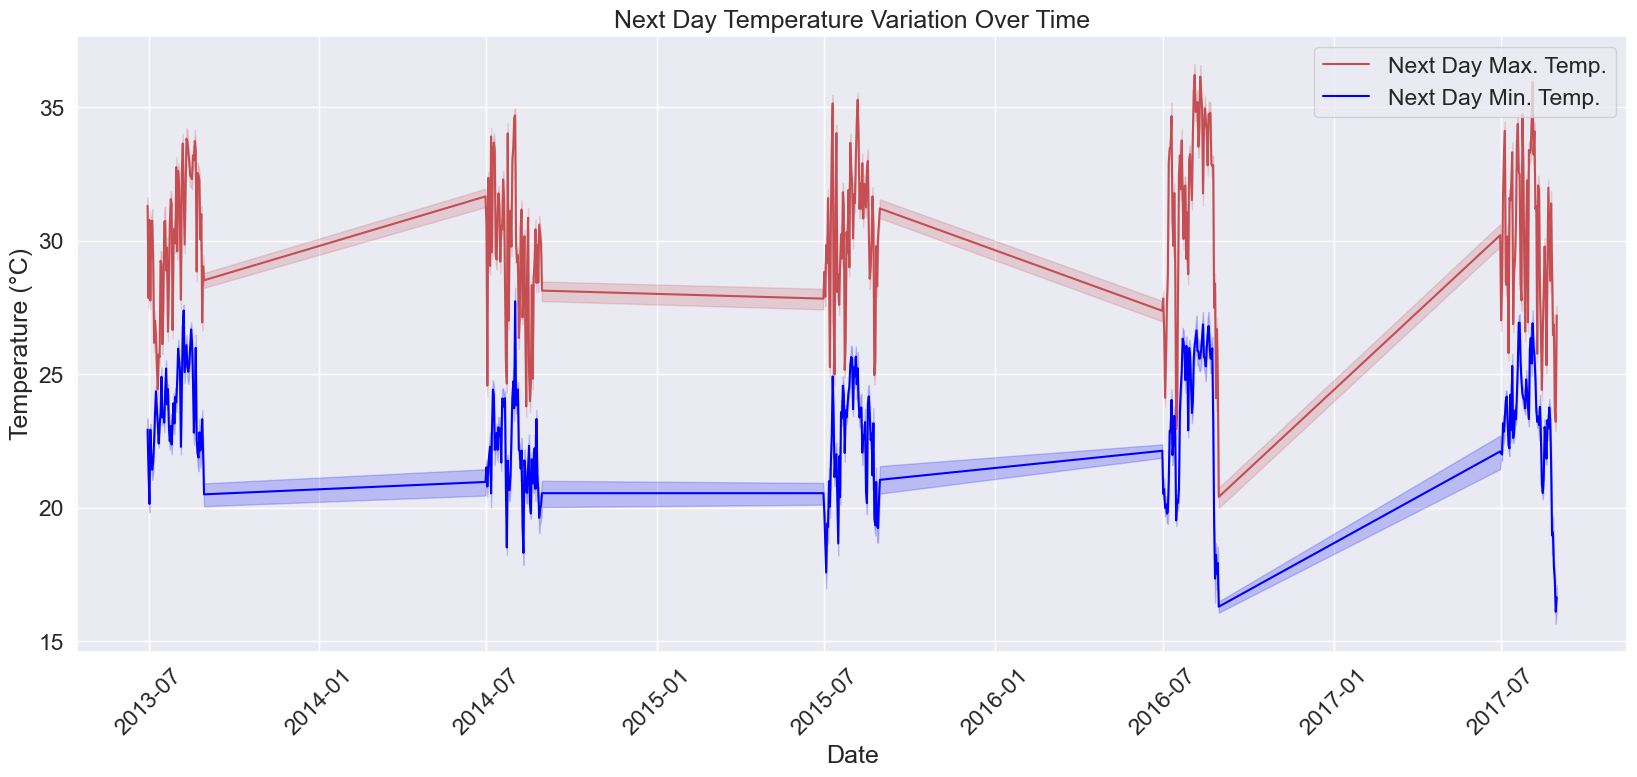

In [32]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)  
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='Next_Tmax', data=df, label='Next Day Max. Temp.', color='r')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='Next_Tmin', data=df, label='Next Day Min. Temp.', color='blue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Next Day Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

#### current maximum vs minimum temperature over time

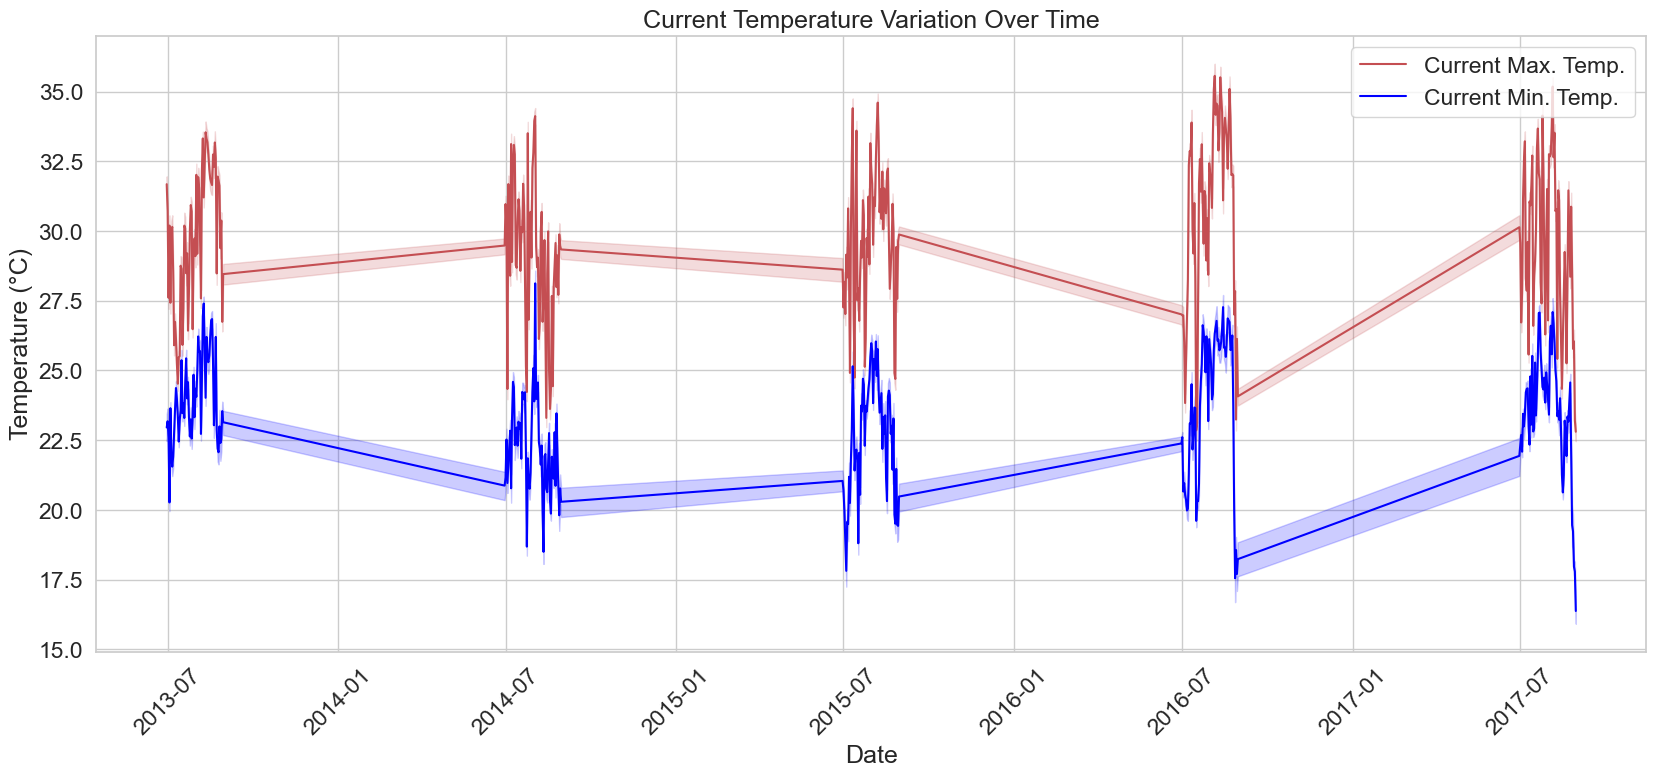

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='Present_Tmax', data=df, label='Current Max. Temp.', color='r')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='Present_Tmin', data=df, label='Current Min. Temp.', color='blue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Current Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

#### Maximumn Humidity level vs Minimum Humidity level

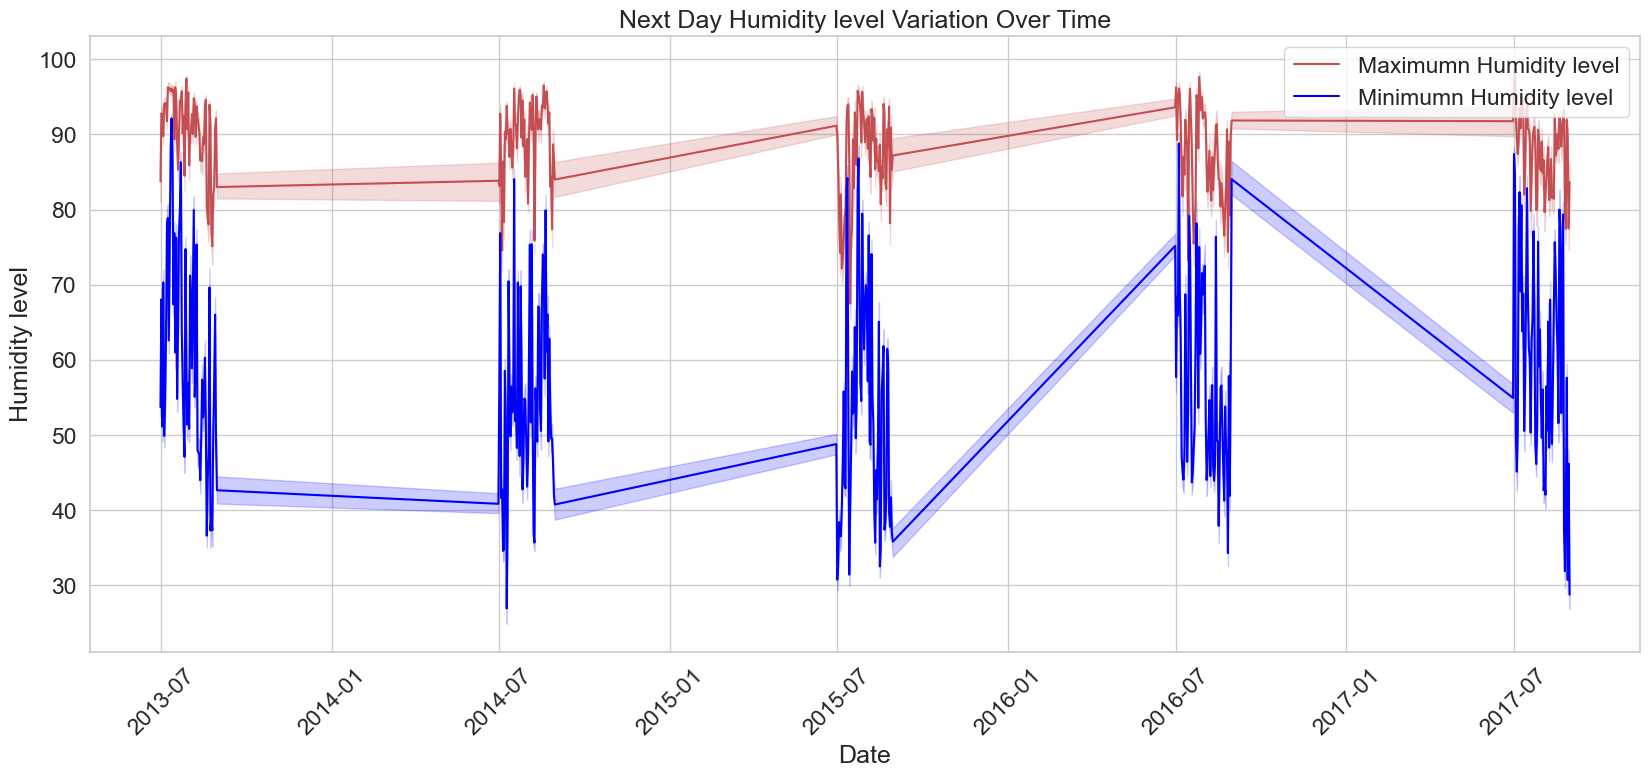

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum humidity level 
sns.lineplot(x='Date', y='LDAPS_RHmax', data=df, label='Maximumn Humidity level', color='r')

# line plot for the minimun humidity level 
sns.lineplot(x='Date', y='LDAPS_RHmin', data=df, label='Minimumn Humidity level', color='blue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Next Day Humidity level Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity level')

plt.show()

#### Maximum temperature applied lapse rate vs minimum temperature applied lapse rate

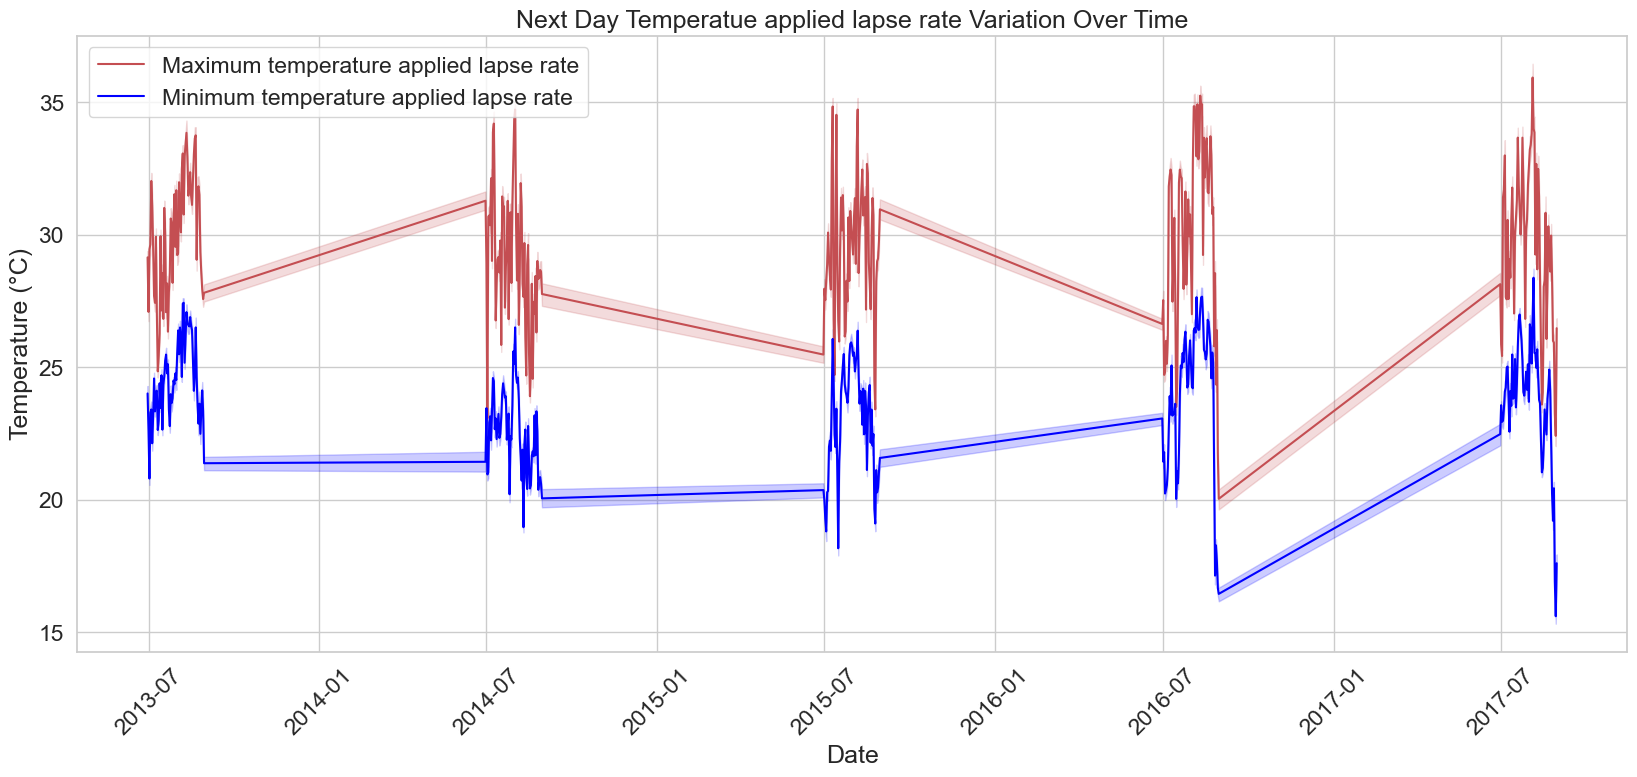

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='LDAPS_Tmax_lapse', data=df, label='Maximum temperature applied lapse rate', color='r')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='LDAPS_Tmin_lapse', data=df, label='Minimum temperature applied lapse rate', color='blue')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Next Day Temperatue applied lapse rate Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

## Comparison model forecast of next-day split average cloud cover over time

LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

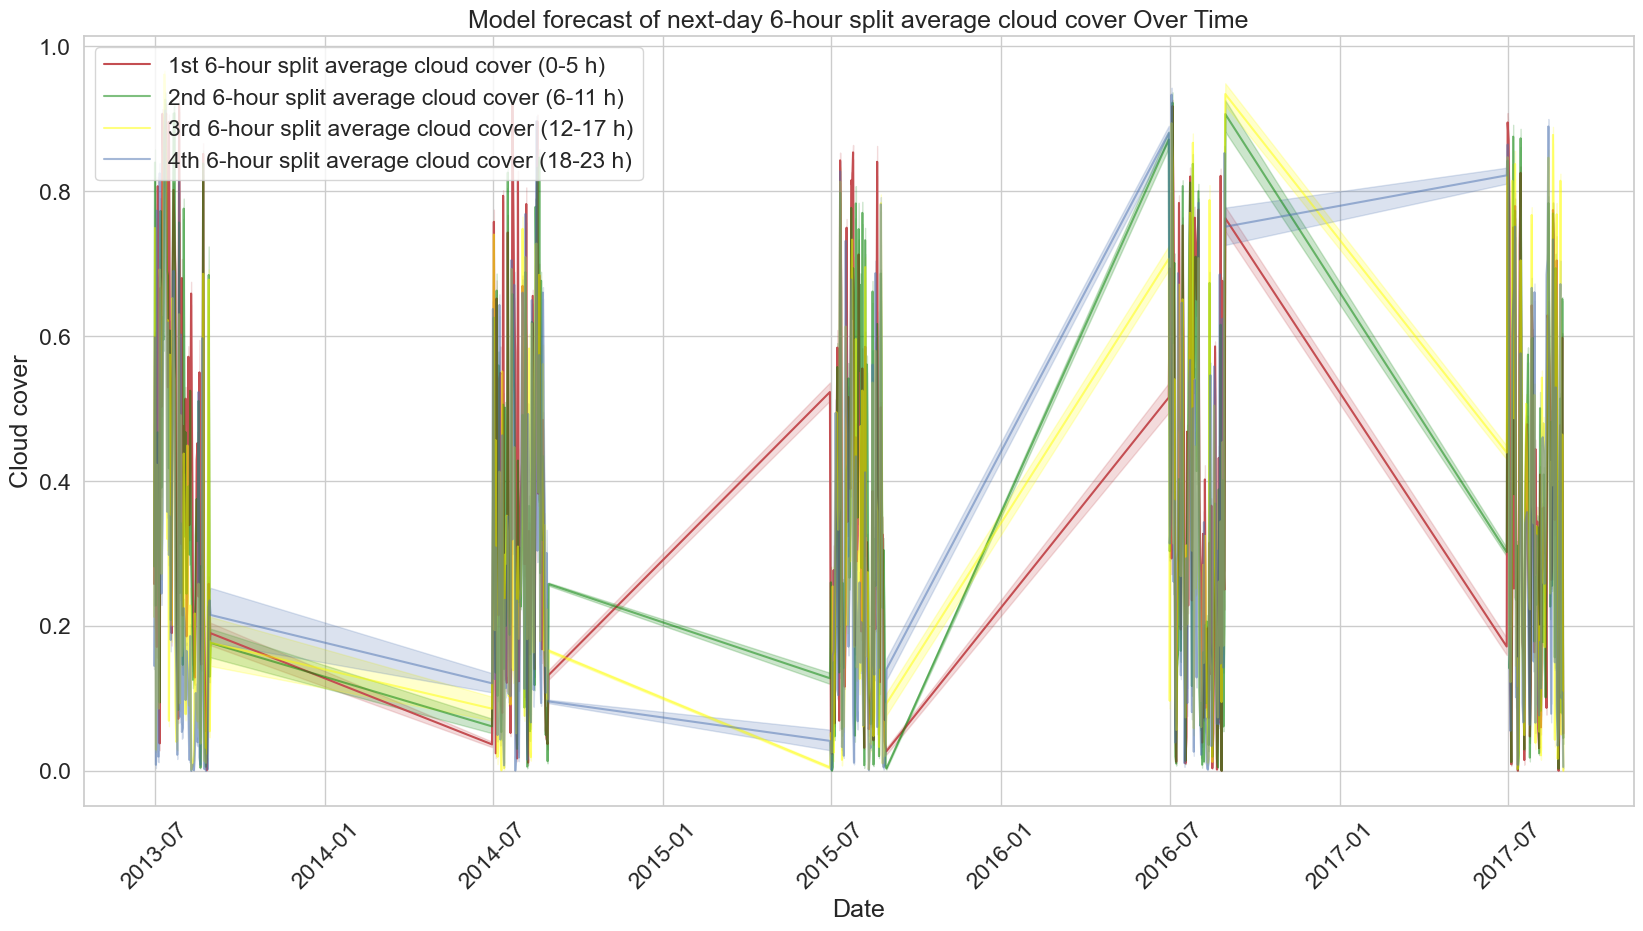

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

sns.lineplot(x='Date', y='LDAPS_CC1', data=df, label='1st 6-hour split average cloud cover (0-5 h)', color='r')
sns.lineplot(x='Date', y='LDAPS_CC2', data=df, label='2nd 6-hour split average cloud cover (6-11 h)', color='green', alpha=.5)
sns.lineplot(x='Date', y='LDAPS_CC3', data=df, label='3rd 6-hour split average cloud cover (12-17 h)', color='yellow', alpha=.5)
sns.lineplot(x='Date', y='LDAPS_CC4', data=df, label='4th 6-hour split average cloud cover (18-23 h)', color='b', alpha=.5)

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day 6-hour split average cloud cover Over Time')
plt.xlabel('Date')
plt.ylabel('Cloud cover')

plt.show()

## Comparison model forecast of next-day split average precipitation over time

LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

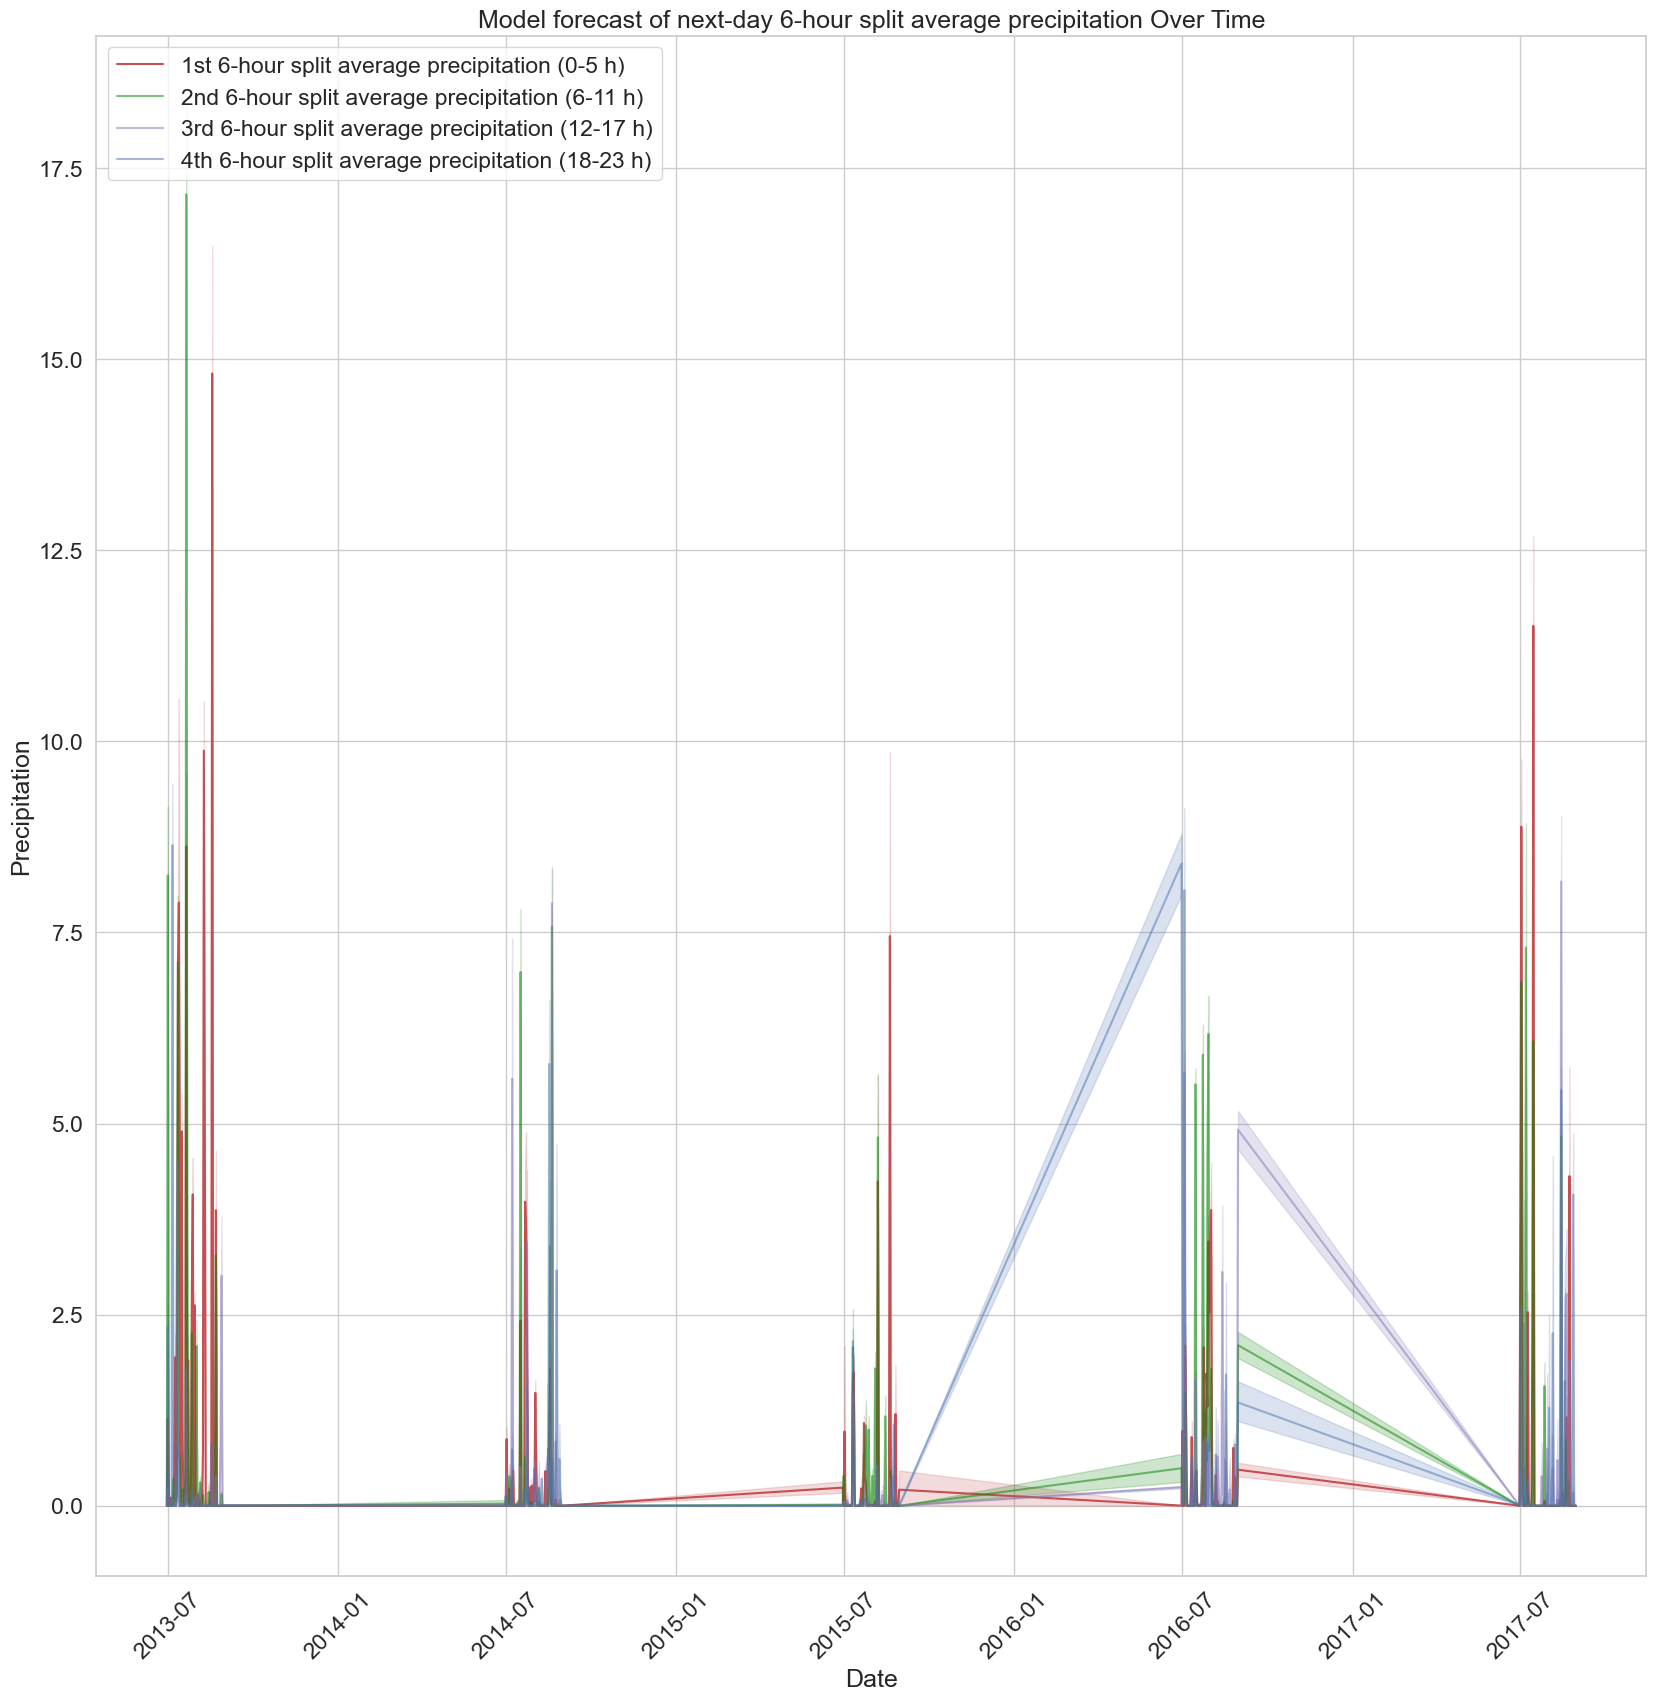

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,20))

sns.lineplot(x='Date', y='LDAPS_PPT1', data=df, label='1st 6-hour split average precipitation (0-5 h)', color='r')
sns.lineplot(x='Date', y='LDAPS_PPT2', data=df, label='2nd 6-hour split average precipitation (6-11 h)', color='green', alpha=.5)
sns.lineplot(x='Date', y='LDAPS_PPT3', data=df, label='3rd 6-hour split average precipitation (12-17 h)', color='m', alpha=.5)
sns.lineplot(x='Date', y='LDAPS_PPT4', data=df, label='4th 6-hour split average precipitation (18-23 h)', color='b', alpha=.5)

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day 6-hour split average precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')

plt.show()

## Model forecast of next-day average wind speed over time

LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9

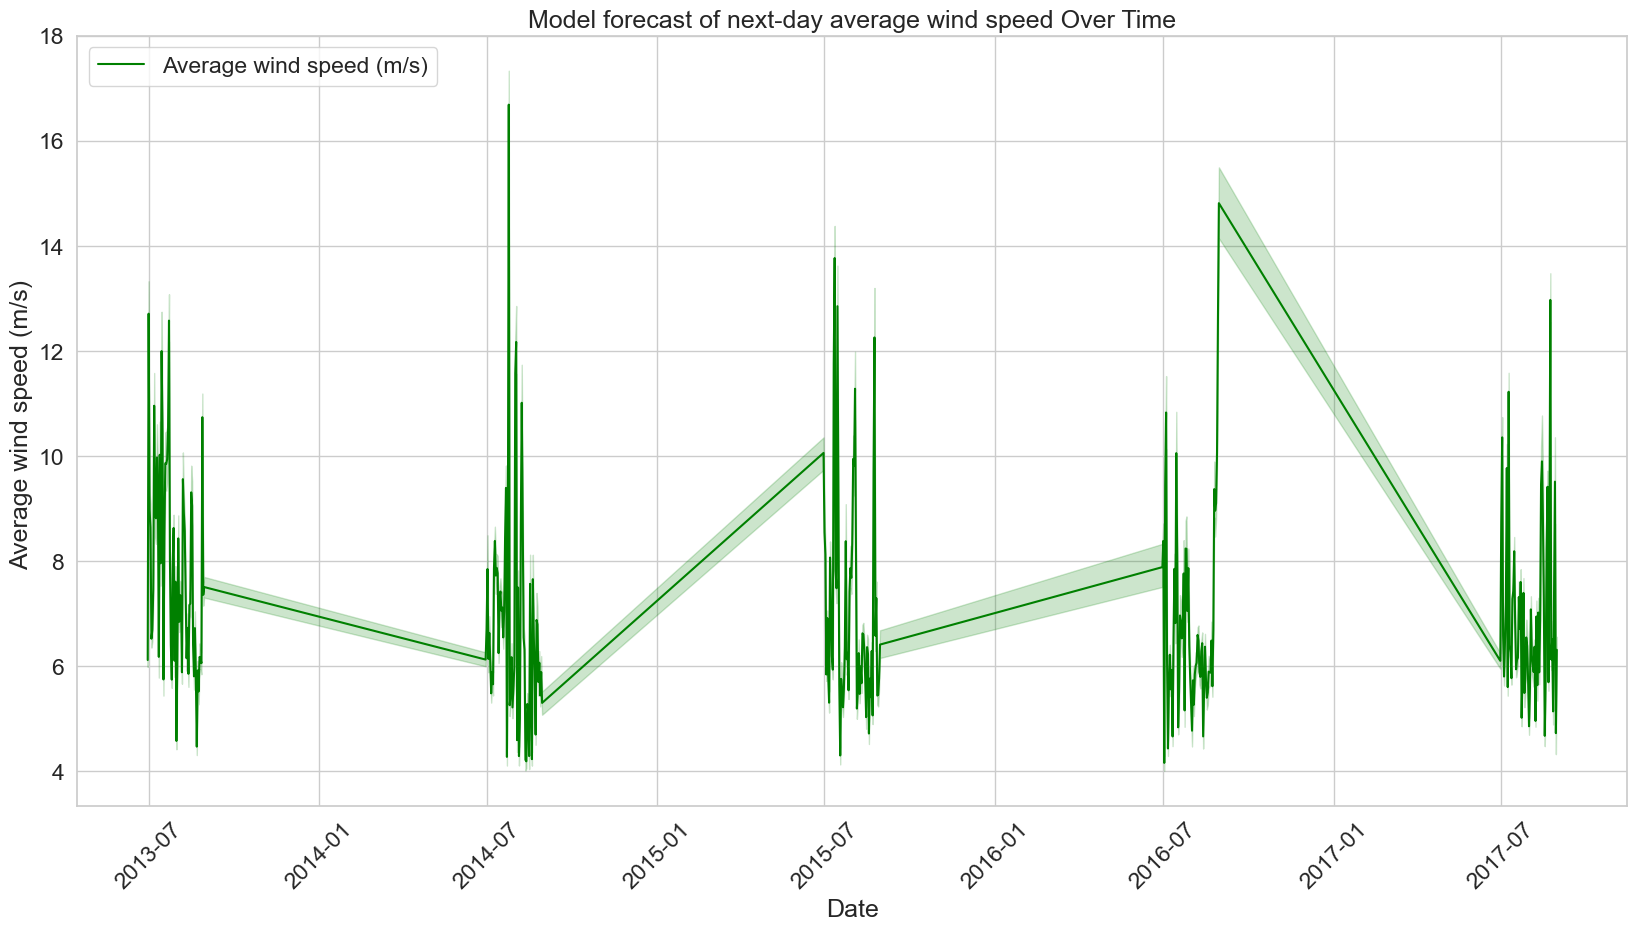

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_WS', data=df, label='Average wind speed (m/s)', color='green')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day average wind speed Over Time')
plt.xlabel('Date')
plt.ylabel('Average wind speed (m/s) ')

plt.show()

## Model forecast of next-day average latent heat flux (W/m2) over time

LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

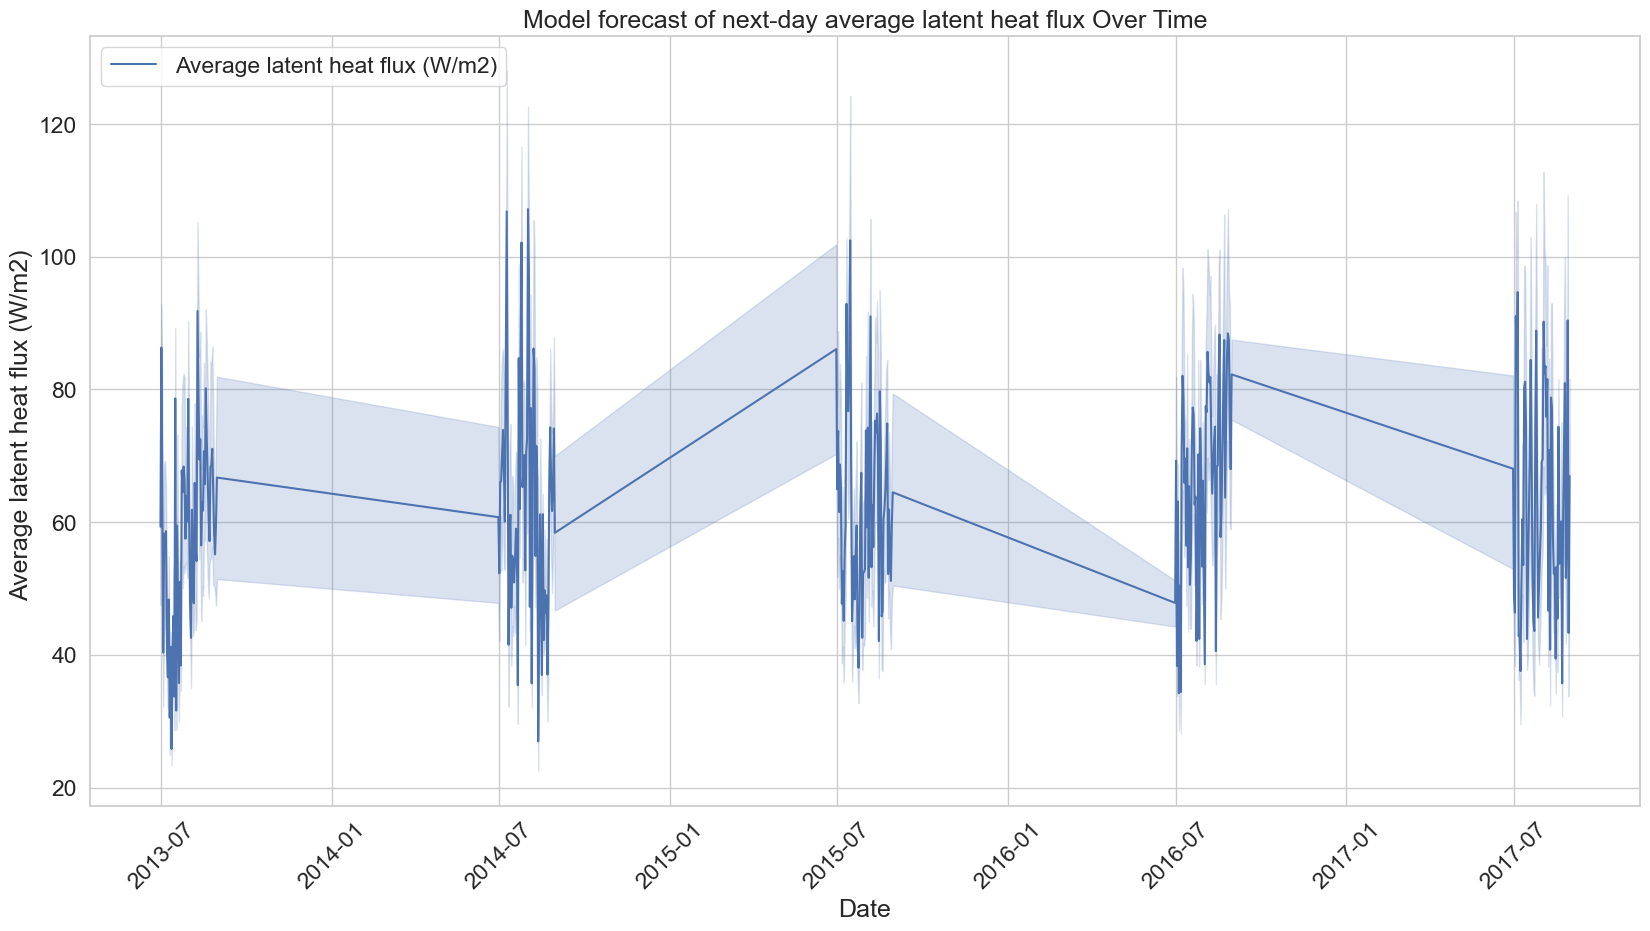

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_LH', data=df, label='Average latent heat flux (W/m2)', color='b')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day average latent heat flux Over Time')
plt.xlabel('Date')
plt.ylabel('Average latent heat flux (W/m2) ')

plt.show()

## Elevation over time

DEM - Elevation (m): 12.4 to 212.3

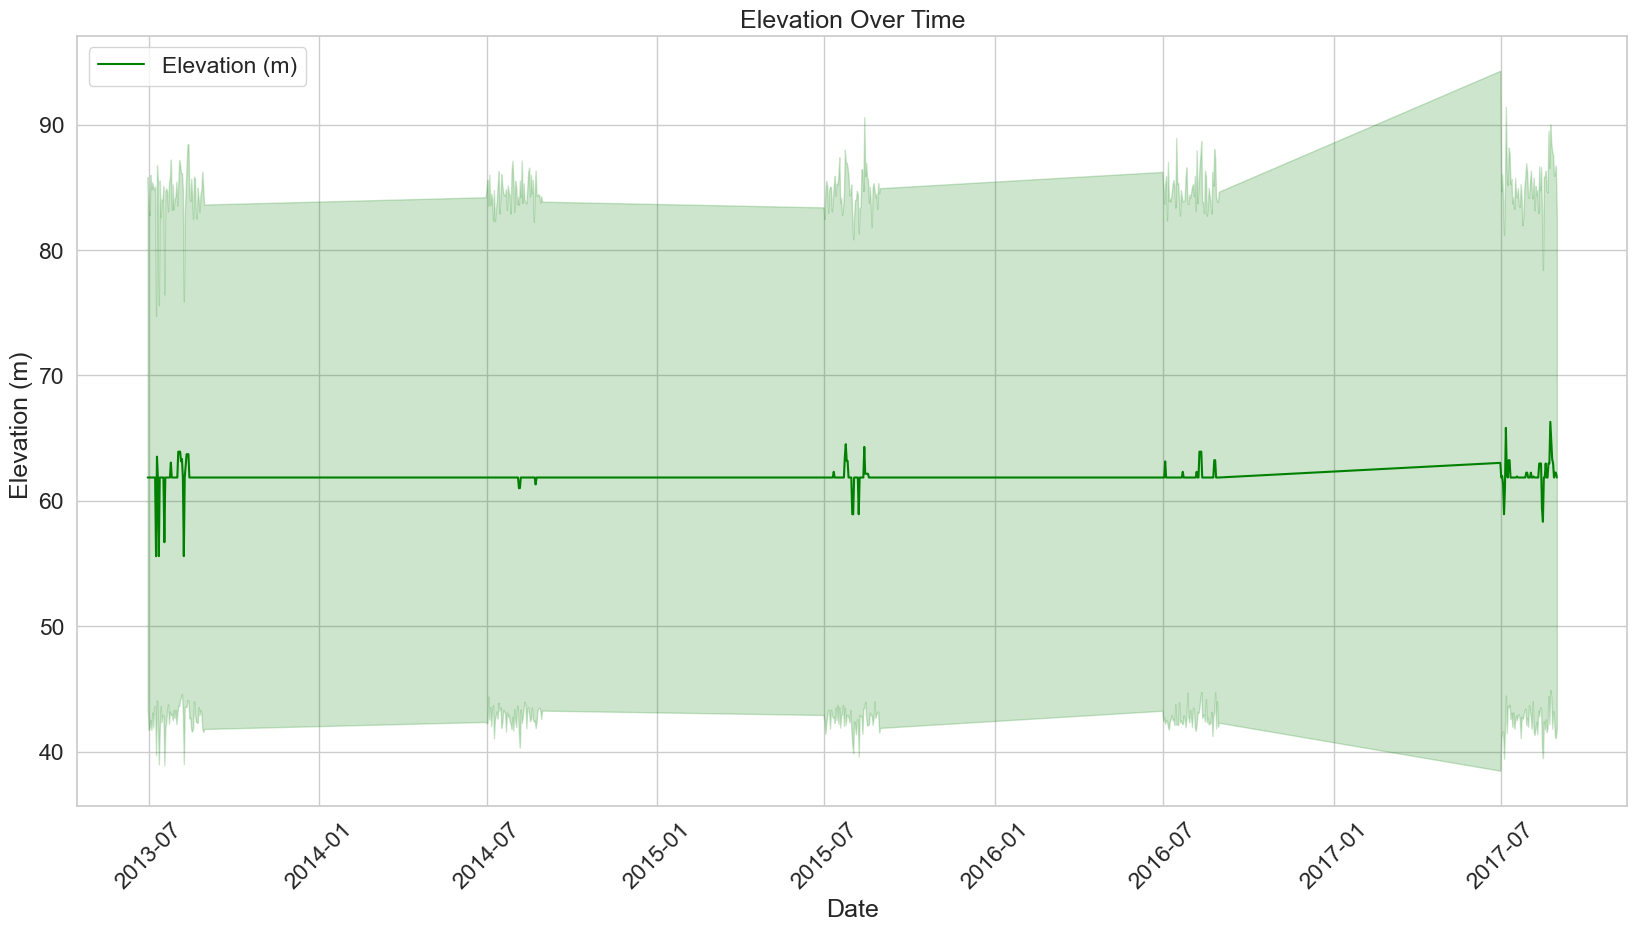

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='DEM', data=df, label='Elevation (m)', color='green')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Elevation Over Time')
plt.xlabel('Date')
plt.ylabel('Elevation (m) ')

plt.show()

## Slope over time

Slope - Slope (Â°): 0.1 to 5.2

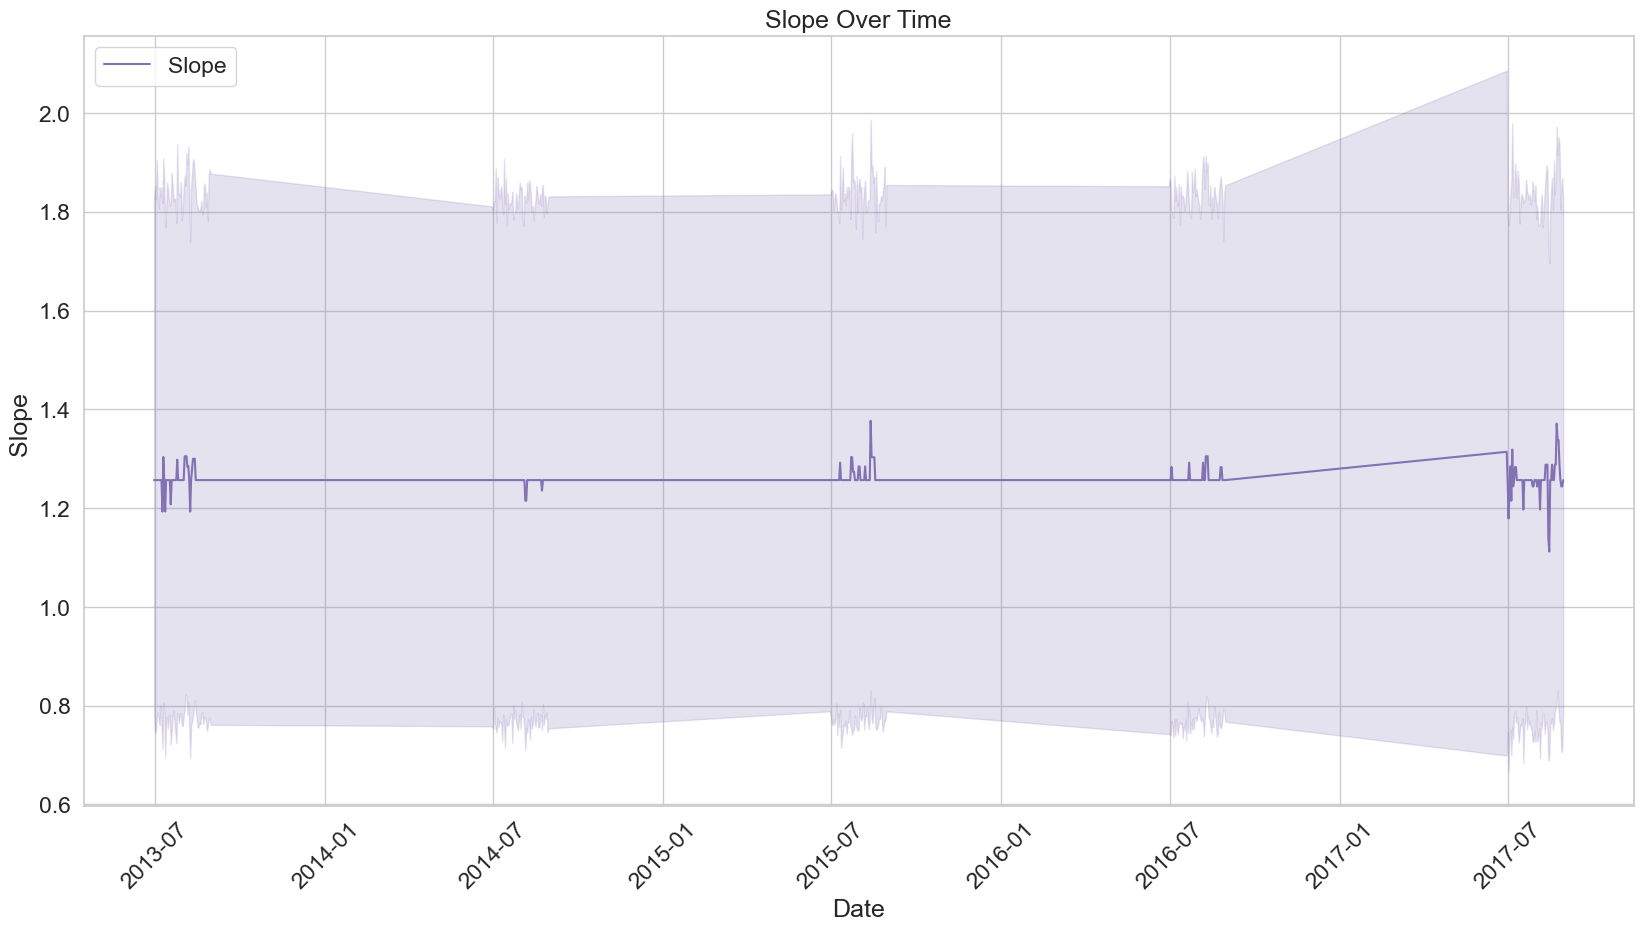

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Slope', data=df, label='Slope', color='m')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Slope Over Time')
plt.xlabel('Date')
plt.ylabel('Slope ')

plt.show()

## Daily incoming Solar radiation over time

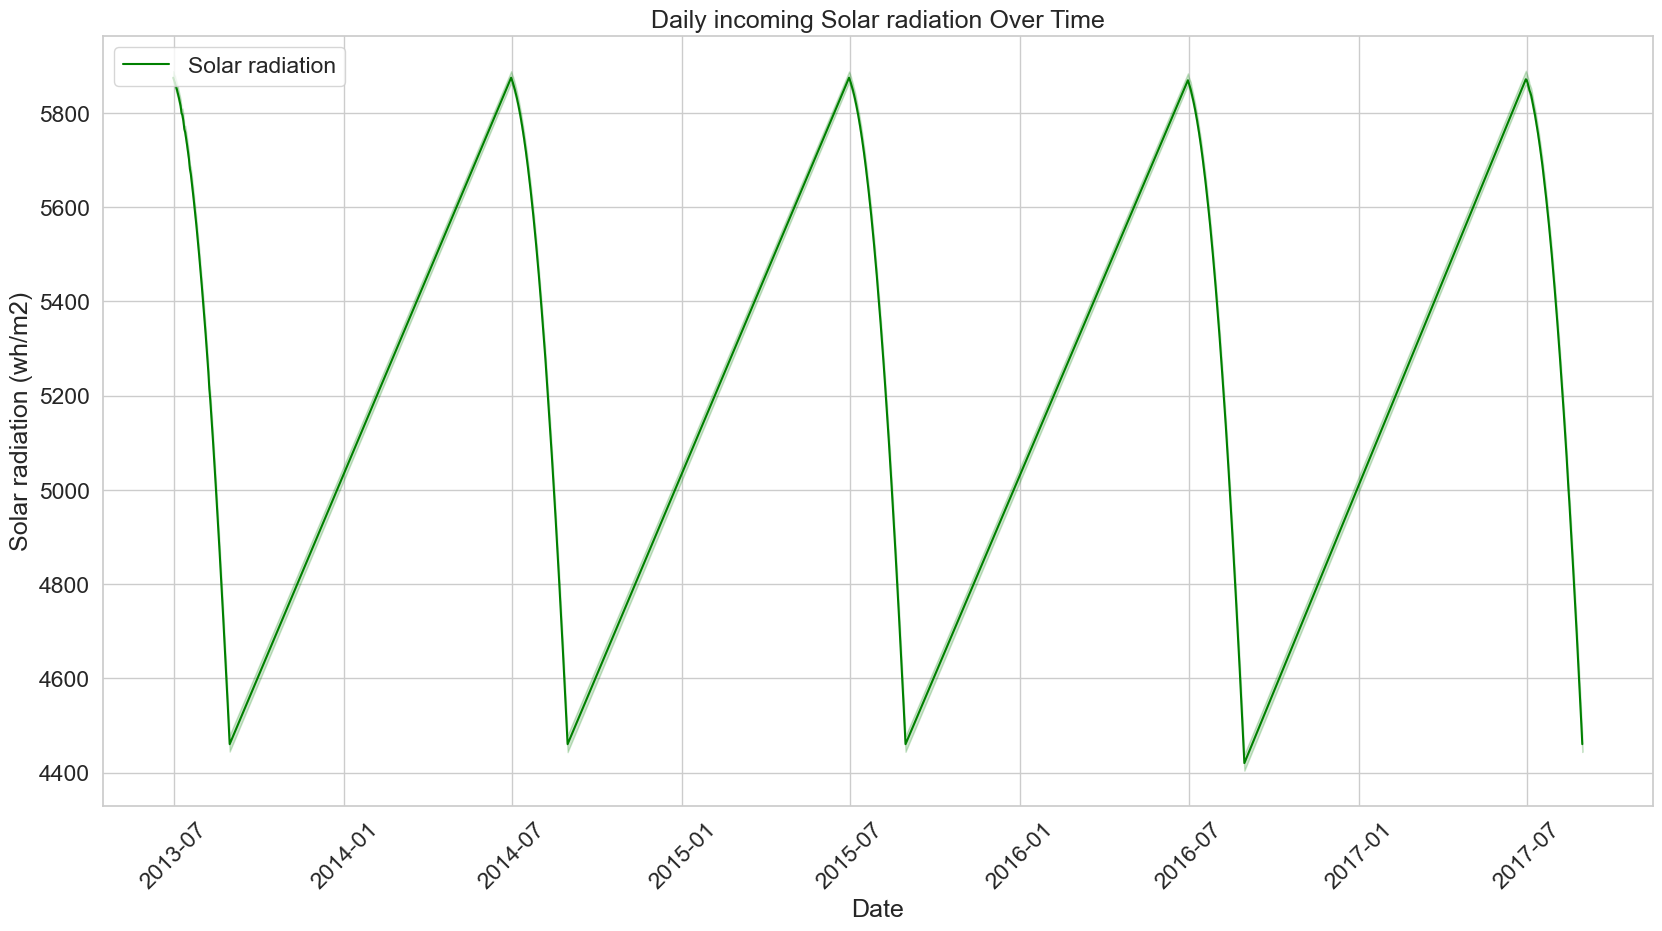

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Solar radiation', data=df, label='Solar radiation', color='green')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Daily incoming Solar radiation Over Time')
plt.xlabel('Date')
plt.ylabel('Solar radiation (wh/m2)')

plt.show()

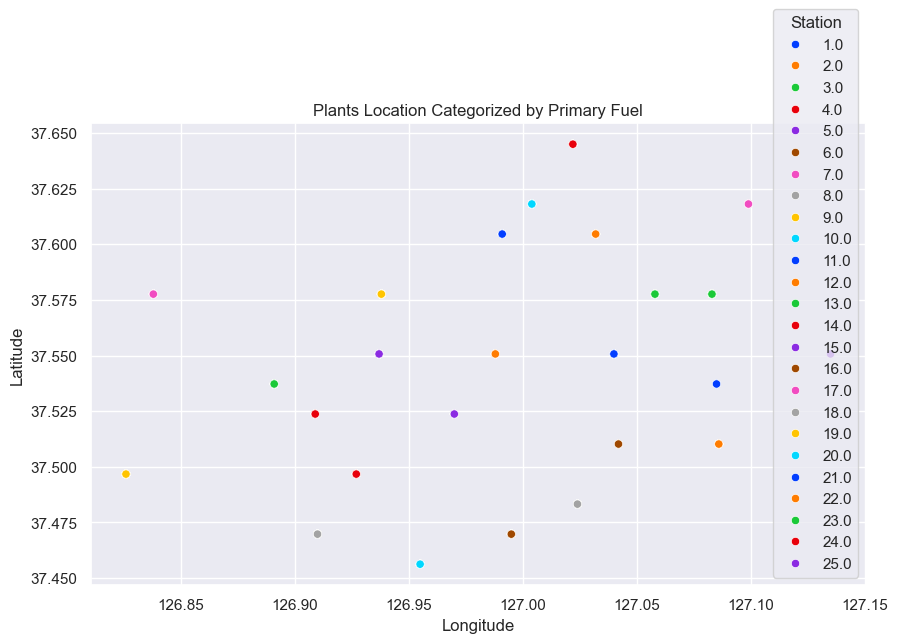

In [43]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1)  

# Map simulation with scatterplot
sns.scatterplot(x='lon', y='lat', hue='station', data=df, palette='bright')

# visual presentation
plt.legend(loc='lower right').set_title("Station")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plants Location Categorized by Primary Fuel')
plt.show()

## Multivariate Analysis

In [44]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Remove Date column which was replace by year, month and day
df.drop(['Date'], axis=1, inplace=True)

df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   year  month  day  
0  2013      6   30  
1  2013      6   30  
2  2013      6   30  
3  2013      6   30  
4  2013      6   30  

[5 rows x 27 columns]

## Correlation

In [45]:
# Calculate the correlation between features
cor = df.corr()
cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   
year              0.001474      0.056002      0.037457    -0.002147   
month             0.003114      0.147358      0.084047    -0.190674   
day              -0.000799     -0.151982     -0.114294    -0.060702   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.886513 -0.102021   
year                -0.144286          0.020308        

In [46]:
# Listing the correlation coeficients with the target variable (Regression model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A']=='Next_Tmax') &  (corr_df['Feature B'] != 'Next_Tmax')]

Feature A         Feature B  Corr coef
30   Next_Tmax  LDAPS_Tmax_lapse   0.835729
54   Next_Tmax         Next_Tmin   0.616629
59   Next_Tmax      Present_Tmax   0.610357
61   Next_Tmax  LDAPS_Tmin_lapse   0.592119
80   Next_Tmax      Present_Tmin   0.463523
165  Next_Tmax          LDAPS_LH   0.156779
217  Next_Tmax           station   0.107747
229  Next_Tmax             month   0.096811
257  Next_Tmax              year   0.061211
326  Next_Tmax   Solar radiation   0.016145
371  Next_Tmax               lon   0.003502
523  Next_Tmax               lat  -0.055367
577  Next_Tmax             Slope  -0.104279
609  Next_Tmax        LDAPS_PPT1  -0.125954
611  Next_Tmax               day  -0.127060
654  Next_Tmax               DEM  -0.174578
658  Next_Tmax        LDAPS_PPT2  -0.186722
666  Next_Tmax        LDAPS_PPT4  -0.190720
671  Next_Tmax        LDAPS_PPT3  -0.203554
693  Next_Tmax       LDAPS_RHmax  -0.289788
701  Next_Tmax          LDAPS_WS  -0.351107
712  Next_Tmax       LDAPS_RHmin  -0.446824
714  Next_Tmax         LDAPS_CC4  -0.454039
715  Next_Tmax         LDAPS_CC1  -0.459705
717  Next_Tmax         LDAPS_CC2  -0.498295
719  Next_Tmax         LDAPS_CC3  -0.523061

### Observation: 

Strong corelation between target variable Next_Tmax and the LDAPS_Tmax_lapse, Next_Tmin, Present_Tmax, LDAPS_Tmin_lapse, and Present_Tmin columns

In [47]:
# Listing the correlation coeficients with the target variable Next_Tmin (Regression model2)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Next_Tmin') & (corr_df['Feature B'] != 'Next_Tmin')]

Feature A         Feature B  Corr coef
28   Next_Tmin  LDAPS_Tmin_lapse   0.886513
31   Next_Tmin      Present_Tmin   0.796975
52   Next_Tmin      Present_Tmax   0.621048
53   Next_Tmin         Next_Tmax   0.616629
63   Next_Tmin  LDAPS_Tmax_lapse   0.589963
190  Next_Tmin           station   0.128184
194  Next_Tmin   Solar radiation   0.125517
232  Next_Tmin       LDAPS_RHmin   0.093249
299  Next_Tmin             month   0.030379
302  Next_Tmin         LDAPS_CC2   0.030358
313  Next_Tmin              year   0.021617
321  Next_Tmin        LDAPS_PPT1   0.018031
457  Next_Tmin        LDAPS_PPT2  -0.012462
462  Next_Tmin         LDAPS_CC1  -0.012877
512  Next_Tmin               lon  -0.045758
526  Next_Tmin         LDAPS_CC3  -0.056490
531  Next_Tmin          LDAPS_LH  -0.060392
542  Next_Tmin        LDAPS_PPT3  -0.068664
547  Next_Tmin       LDAPS_RHmax  -0.076415
560  Next_Tmin               lat  -0.085136
561  Next_Tmin         LDAPS_CC4  -0.086197
573  Next_Tmin          LDAPS_WS  -0.102021
596  Next_Tmin        LDAPS_PPT4  -0.114900
620  Next_Tmin               day  -0.134284
634  Next_Tmin             Slope  -0.148379
686  Next_Tmin               DEM  -0.249303

### Observation: 

Strong corelation between target variable Next_Tmin and the LDAPS_Tmin_lapse, Present_Tmin, Present_Tmax, Next_Tmax, and LDAPS_Tmax_lapse

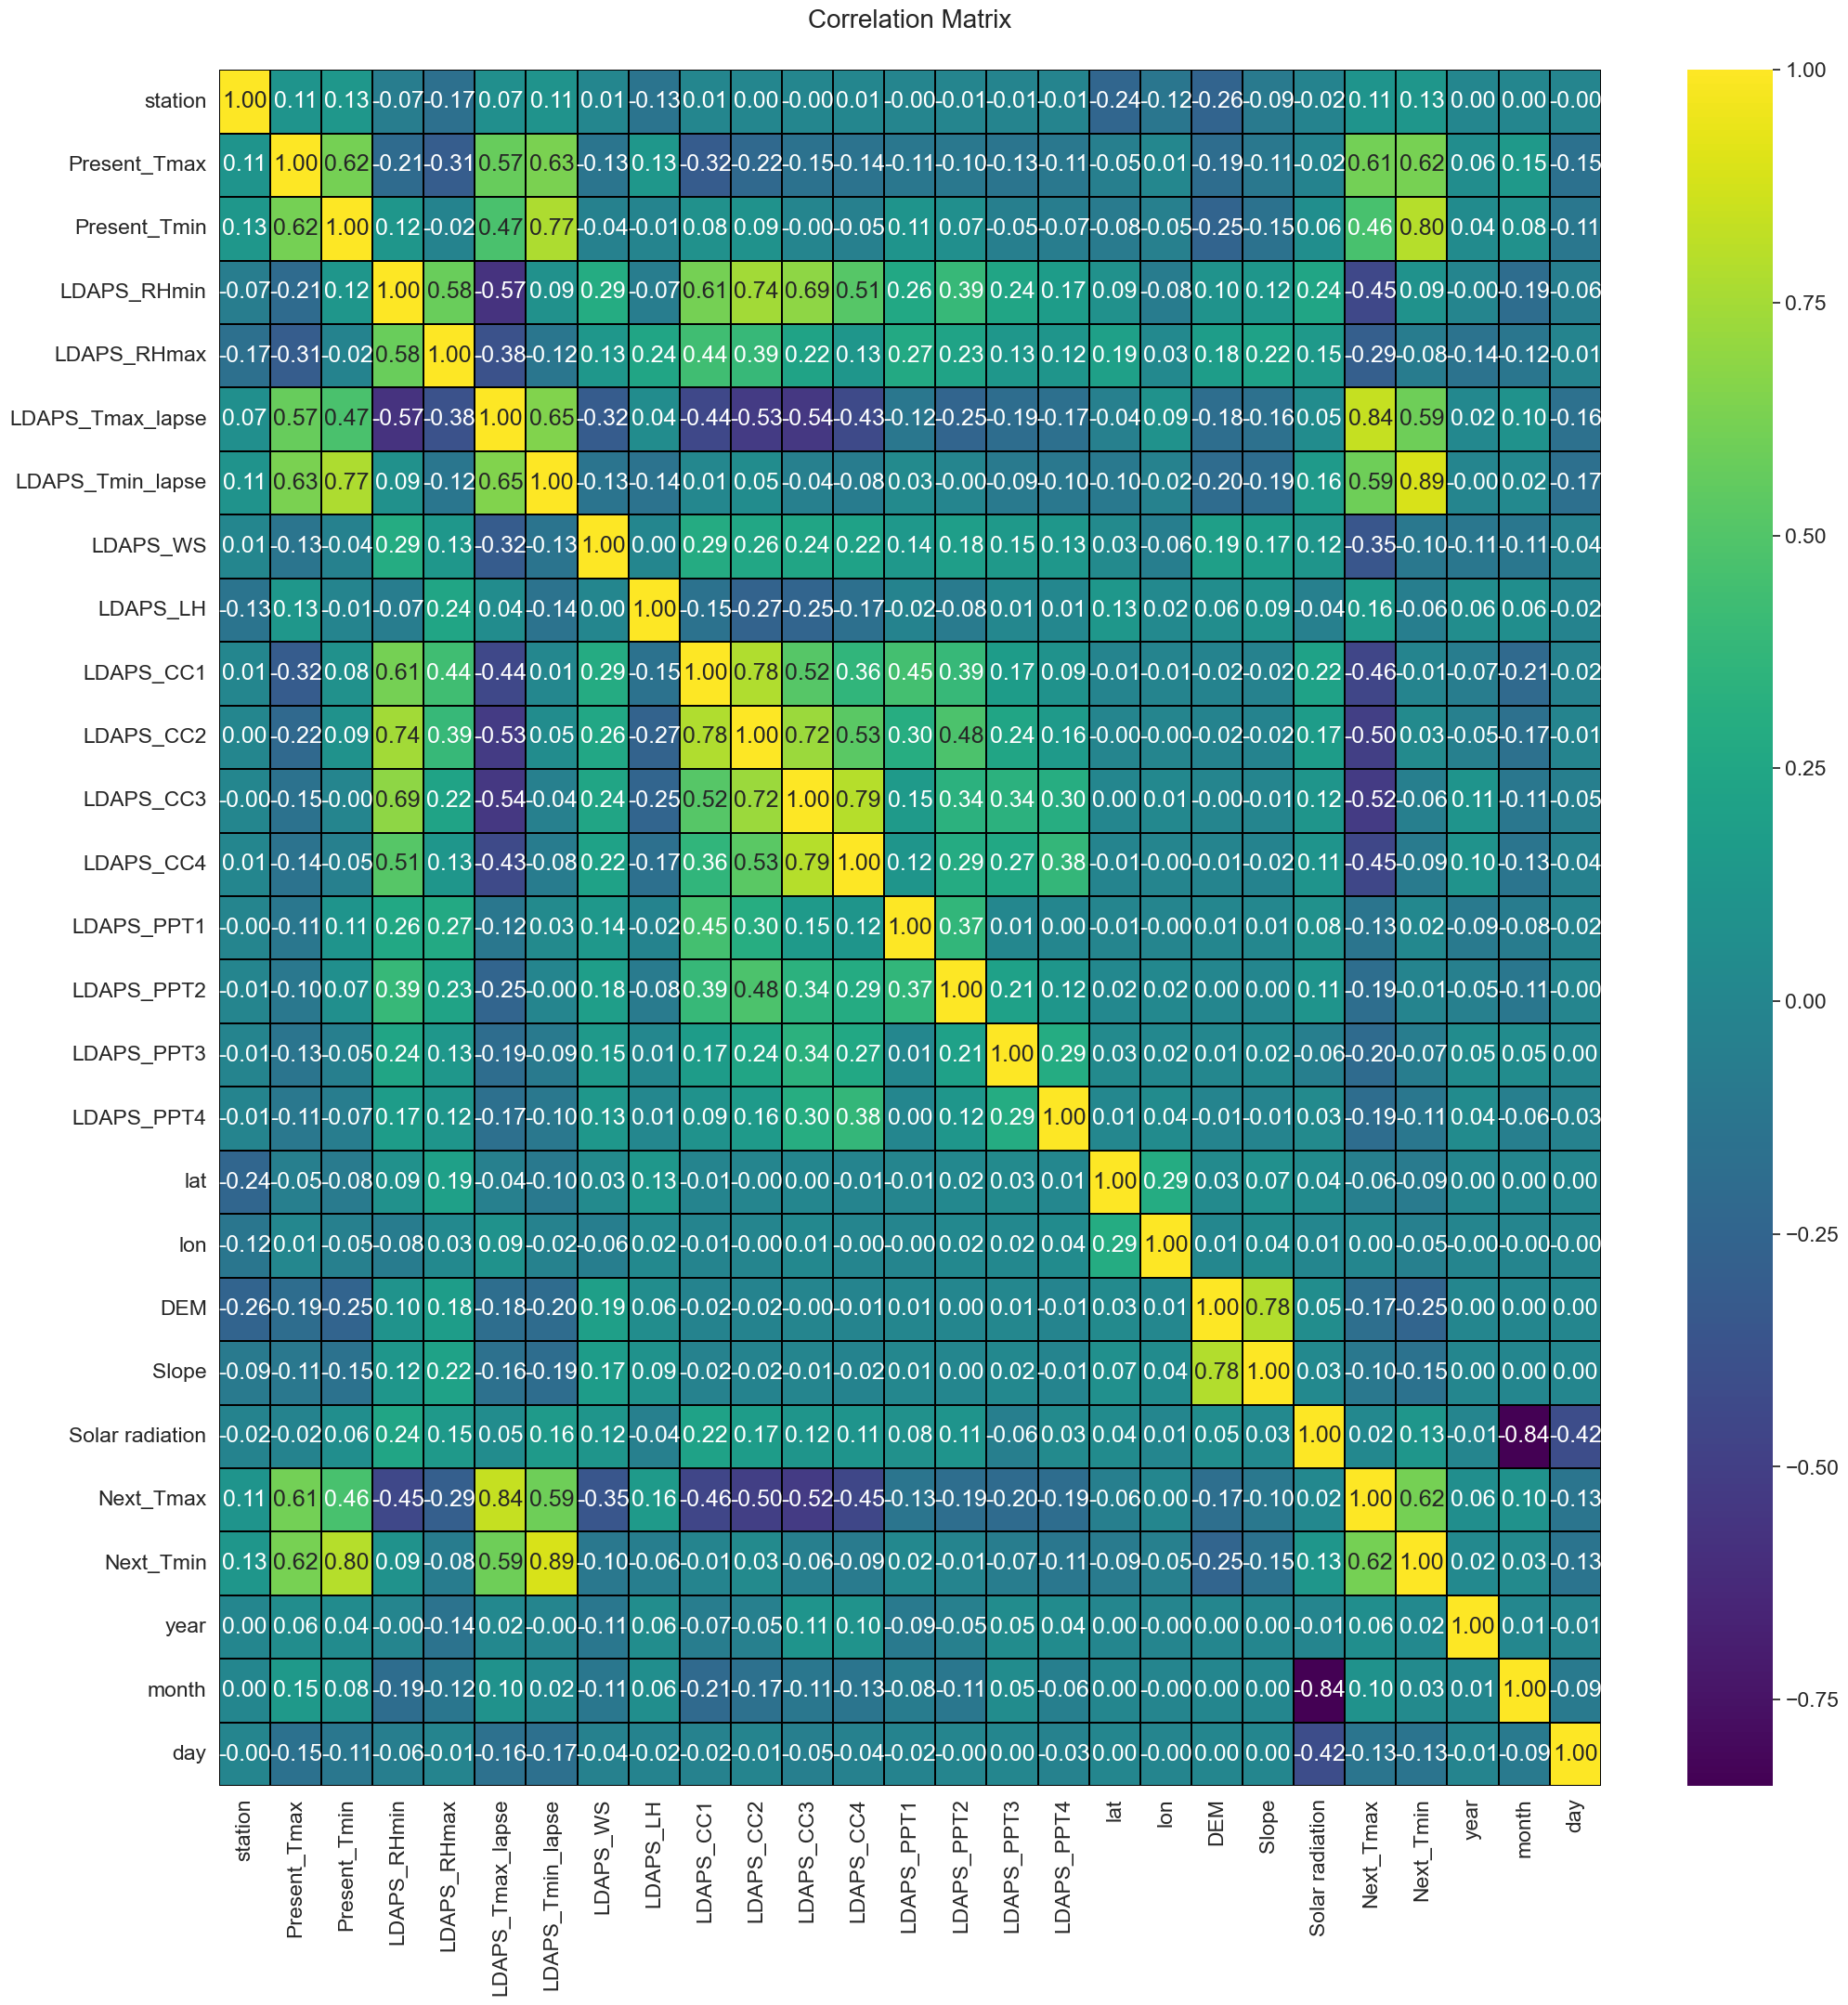

In [48]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.set(font_scale=1.5)

sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='viridis', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

### Observation:

•The Next_Tmax feature has a positive correlation with the LDAPS_Tmax_laspse(+0.84), Next_Tmin(+0.62), Present_Tmax(+0.61), Present_Tmin(+0.46), LDAPS_Tmin_lapse(+0.59). Also, has a negative correlation with LDAPS_CC columns(-0.52), LDAPS_RHmin(-0.45) and LDAPS_RHmax(-0.29)

The Next_Tmin feature has a positive correlation with the LDAPS_Tmin_laspse(+0.84), Present_Tmin(+0.80), Present_Tmax(+0.61), LDAPS_Tmin_lapse(+0.59), then LDAPS_CC columns(+0.52) and is negatively correlated with primary_fuel column(-0.38)

The Next_Tmax and Next__Tmin are positive correlated (+0.ense.

DEM is highly correlated with Slope (+0.78)

LDAPS columns are correlated with each other.

LDAPS_Tmas_lapse and LDAPS_Tmas_lapse are correlated with Present_Tmax and Psent_Tmin.



# 2. Preprocessing Data 

### Removing outliers

In [49]:
col_with_outlier = ['LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
col_with_outlier

['LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4']

In [50]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df[col_with_outlier]))
z

LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
0        0.382768          0.525269          0.215525  0.126423  0.206603   
1        0.311697          0.078334          0.223368  0.644133  0.313359   
2        0.609425          0.160080          0.449896  0.439100  1.244497   
3        1.128335          0.028710          0.079238  0.663353  0.096026   
4        0.249244          0.171981          0.010803  0.624327  1.349989   
...           ...               ...               ...       ...       ...   
7745     1.402898          0.614083          2.223667  0.225479  1.569844   
7746     0.648815          0.990460          2.432415  0.609132  0.583486   
7747     1.318376          1.110333          2.021883  0.434188  0.283984   
7748     1.537141          0.886737          2.039881  0.253241  0.452772   
7749     1.544257          0.570995          2.129768  0.089654  1.585402   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  
0       0.305589    0.275777    0.239969    0.224971  
1       0.305589    0.275777    0.239969    0.224971  
2       0.305589    0.275777    0.239969    0.224971  
3       0.305589    0.275777    0.239969    0.224971  
4       0.305589    0.275777    0.239969    0.224971  
...          ...         ...         ...         ...  
7745    0.305589    0.275777    0.239969    0.224971  
7746    0.305589    0.275777    0.239969    0.224971  
7747    0.305589    0.275777    0.239969    0.224971  
7748    0.305589    0.275777    0.239969    0.224971  
7749    0.305589    0.275777    0.239969    0.224971  

[7588 rows x 9 columns]

In [51]:
# threshold = 3.2
df_new = df[(z<3.2).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()
df

707 rows with outliers were deleted.
This represent 9.32% of the data.
In the new dataset there are 6881 rows and 27 columns.


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
...   ...      ...      ...       ...     ...              ...        ...   
7745  ...  37.5507  127.040   26.2980  0.5721      4456.024414       27.6   
7746  ...  37.5102  127.086   21.9668  0.1332      4441.803711       28.0   
7747  ...  37.5372  126.891   15.5876  0.1554      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.2223      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.2713      4451.345215       27.8   

      Next_Tmin  year  month  day  
0          21.2  2013      6   30  
1          22.5  2013      6   30  
2          23.9  2013      6   30  
3          24.3  2013      6   30  
4          22.5  2013      6   30  
...         ...   ...    ...  ...  
7745       17.7  2017      8   30  
7746       17.1  2017      8   30  
7747       18.1  2017      8   30  
7748       18.8  2017      8   30  
7749       17.4  2017      8   30  

[6881 rows x 27 columns]

# Skewness Correction

In [52]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
LDAPS_PPT4        5.902593
LDAPS_PPT3        5.507149
LDAPS_PPT2        4.808113
LDAPS_PPT1        3.739020
DEM               1.746879
Slope             1.585009
LDAPS_WS          1.120269
LDAPS_CC4         0.704094
LDAPS_CC3         0.692027
LDAPS_CC1         0.579523
LDAPS_LH          0.575607
LDAPS_CC2         0.500824
LDAPS_RHmin       0.311593
lat               0.096784
year              0.012827
station          -0.004470
day              -0.006794
LDAPS_Tmax_lapse -0.129103
month            -0.162986
lon              -0.277560
Next_Tmax        -0.282221
Present_Tmax     -0.291643
Present_Tmin     -0.341983
Next_Tmin        -0.355235
LDAPS_Tmin_lapse -0.442761
Solar radiation  -0.521979
LDAPS_RHmax      -0.729477

we will transfornm the columns which have skewness greater than 0.5

In [53]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['DEM',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_LH',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'LDAPS_WS',
 'Slope']

In [54]:
skew_columns.remove('DEM')
skew_columns.remove('Slope')

In [56]:
# Apply all the 3 transfoemation methods and check which works the best

df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

In [57]:
df_transformed

LDAPS_CC1_cbrt  LDAPS_CC1_sqrt  LDAPS_CC1_log  LDAPS_CC2_cbrt  \
0           0.616178        0.483681      -1.452659        0.588576   
1           0.608678        0.474877      -1.489399        0.631445   
2           0.593772        0.457541      -1.563778        0.636173   
3           0.600344        0.465158      -1.530756        0.609122   
4           0.532985        0.389110      -1.887784        0.629957   
...              ...             ...            ...             ...   
7745        0.375397        0.230005      -2.939310        0.311305   
7746        0.405063        0.257801      -2.711138        0.290512   
7747        0.310841        0.173304      -3.505419        0.432737   
7748        0.329807        0.189404      -3.327747        0.421646   
7749        0.365815        0.221254      -3.016884        0.391201   

      LDAPS_CC2_sqrt  LDAPS_CC2_log  LDAPS_CC3_cbrt  LDAPS_CC3_sqrt  \
0           0.451548      -1.590147        0.544796        0.402115   
1           0.501768      -1.379234        0.542254        0.399304   
2           0.507414      -1.356854        0.588764        0.451765   
3           0.475397      -1.487210        0.544189        0.401444   
4           0.499995      -1.386313        0.563461        0.422957   
...              ...            ...             ...             ...   
7745        0.173692      -3.500943        0.000000        0.000000   
7746        0.156584      -3.708328        0.008363        0.000765   
7747        0.284667      -2.512874        0.000000        0.000000   
7748        0.273793      -2.590769        0.000000        0.000000   
7749        0.244681      -2.815603        0.000000        0.000000   

      LDAPS_CC3_log  LDAPS_CC4_cbrt  ...  LDAPS_CC1  LDAPS_CC2     LDAPS_CC3  \
0         -1.822032        0.507783  ...   0.233947   0.203896  1.616969e-01   
1         -1.836062        0.503610  ...   0.225508   0.251771  1.594441e-01   
2         -1.589187        0.521864  ...   0.209344   0.257469  2.040915e-01   
3         -1.825374        0.512039  ...   0.216372   0.226002  1.611574e-01   
4         -1.720970        0.553989  ...   0.151407   0.249995  1.788925e-01   
...             ...             ...  ...        ...        ...           ...   
7745           -inf        0.163615  ...   0.052902   0.030169  0.000000e+00   
7746     -14.351654        0.260501  ...   0.066461   0.024518  5.850000e-07   
7747           -inf        0.000000  ...   0.030034   0.081035  0.000000e+00   
7748           -inf        0.000000  ...   0.035874   0.074962  0.000000e+00   
7749           -inf        0.092683  ...   0.048954   0.059869  0.000000e+00   

      LDAPS_CC4    LDAPS_LH  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  \
0      0.130928   69.451805         0.0         0.0         0.0         0.0   
1      0.127727   51.937448         0.0         0.0         0.0         0.0   
2      0.142125   20.573050         0.0         0.0         0.0         0.0   
3      0.134249   65.727144         0.0         0.0         0.0         0.0   
4      0.170021  107.965535         0.0         0.0         0.0         0.0   
...         ...         ...         ...         ...         ...         ...   
7745   0.004380    9.614074         0.0         0.0         0.0         0.0   
7746   0.017678   82.146707         0.0         0.0         0.0         0.0   
7747   0.000000   72.058294         0.0         0.0         0.0         0.0   
7748   0.000000   47.241457         0.0         0.0         0.0         0.0   
7749   0.000796    9.090034         0.0         0.0         0.0         0.0   

      LDAPS_WS  
0     6.818887  
1     5.691890  
2     6.138224  
3     5.650050  
4     5.735004  
...        ...  
7745  6.603253  
7746  5.768083  
7747  6.148918  
7748  6.542819  
7749  7.289264  

[6881 rows x 40 columns]

In [58]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

index  Skewness     feature  Skewness_abs
35        LDAPS_CC2  0.500824       LDAPS      0.500824
36   LDAPS_CC1_sqrt -0.175198   LDAPS_CC1      0.175198
32   LDAPS_CC2_sqrt -0.287417   LDAPS_CC2      0.287417
28   LDAPS_CC3_sqrt -0.096679   LDAPS_CC3      0.096679
24   LDAPS_CC4_sqrt  0.005524   LDAPS_CC4      0.005524
20    LDAPS_LH_sqrt  0.003068    LDAPS_LH      0.003068
18  LDAPS_PPT1_cbrt  1.903919  LDAPS_PPT1      1.903919
14  LDAPS_PPT2_cbrt  2.339830  LDAPS_PPT2      2.339830
10  LDAPS_PPT3_cbrt  2.473531  LDAPS_PPT3      2.473531
6   LDAPS_PPT4_cbrt  2.806148  LDAPS_PPT4      2.806148
1      LDAPS_WS_log  0.403867    LDAPS_WS      0.403867

cube-root : LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, and LDAPS_PPT4

square-root : LDAPS_CC3 and LDAPS_CC4

logarithmic : LDAPS_WS.

In [59]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
sqrt_columns = ['LDAPS_CC3', 'LDAPS_CC4']


print(f"Cube-root: {cbrt_columns}")
print(f"Square-root: {sqrt_columns}")

# Update the df dataset with the transfor data with cube-root method.
for col in cbrt_columns:
    df[col] = np.cbrt(df[col])
    
# Update the df dataset with the transfor data with square-root method.
for col in sqrt_columns:
    df[col] = np.sqrt(df[col]) 

Cube-root: ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
Square-root: ['LDAPS_CC3', 'LDAPS_CC4']


In [60]:
# log Transform the LDAPS_WS column
df['LDAPS_WS'] = np.log(df['LDAPS_WS'])

In [61]:
# new skewness for the transformed columns
df[skew_columns].skew()

LDAPS_CC1     0.579523
LDAPS_CC2     0.500824
LDAPS_CC3    -0.096679
LDAPS_CC4     0.005524
LDAPS_LH      0.575607
LDAPS_PPT1    1.903919
LDAPS_PPT2    2.339830
LDAPS_PPT3    2.473531
LDAPS_PPT4    2.806148
LDAPS_WS      0.403867
dtype: float64

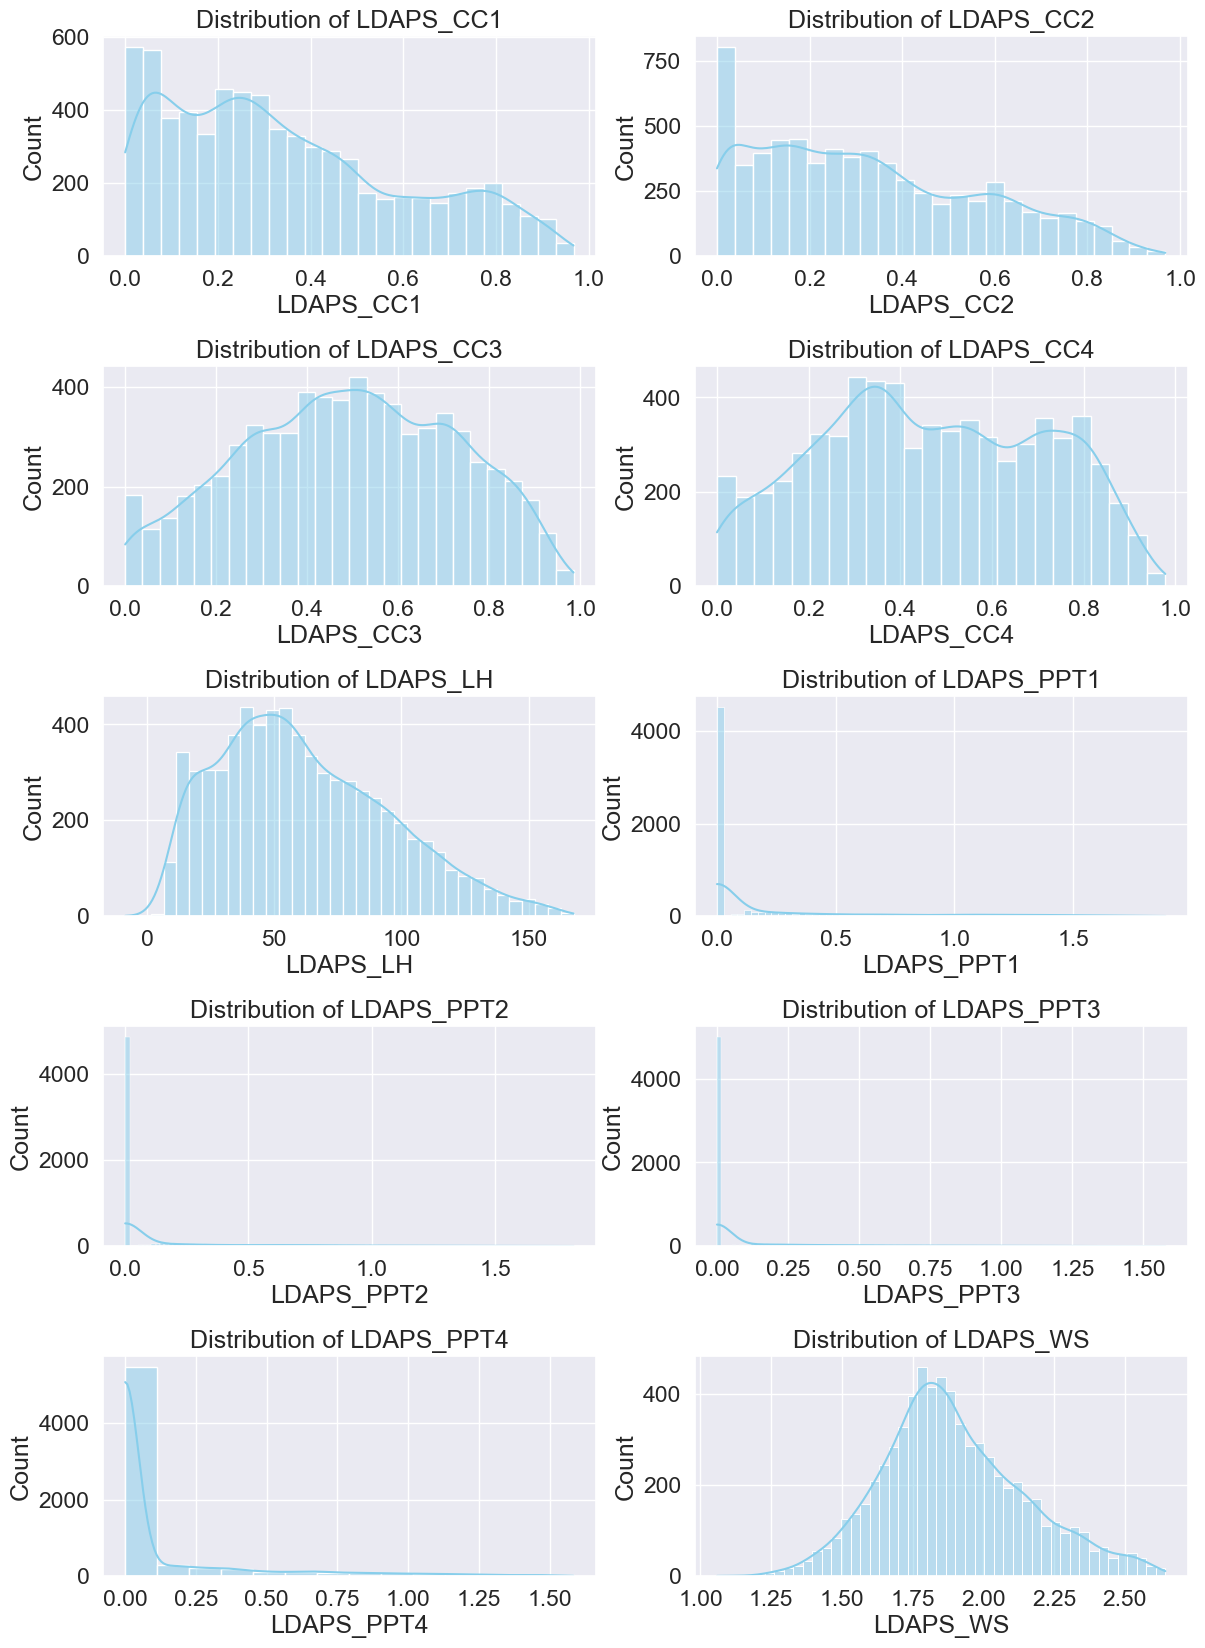

In [62]:
# Visualizing the distribution 
fig, axs = plt.subplots(5, 2, figsize=(14, 20))
for ax, column in zip(axs.flat, skew_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='skyblue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

## Feature Scaling using Standard Scalarization

## Separating features and labels

In [63]:
# Separating the independent and target variables into x and y 
x = df.drop('Next_Tmax', axis=1)
y = df['Next_Tmax']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

Feature Dimension = (6881, 26)
Label Dimension = (6881,)


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  1.919696   69.451805   0.233947  ...   
1         29.850689         24.035009  1.739042   51.937448   0.225508  ...   
2         30.091292         24.565633  1.814535   20.573050   0.209344  ...   
3         29.704629         23.326177  1.731664   65.727144   0.216372  ...   
4         29.113934         23.486480  1.746589  107.965535   0.151407  ...   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmin  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       21.2   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       22.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       23.9   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       24.3   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       22.5   

   year  month  day  
0  2013      6   30  
1  2013      6   30  
2  2013      6   30  
3  2013      6   30  
4  2013      6   30  

[5 rows x 26 columns]

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

## Separating features for regression model 2 to predict Next_Tmin

In [64]:
# Separating the independent and target variables into x and y 
x2 = df.drop('Next_Tmin', axis=1)
y2 = df['Next_Tmin']

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

Feature Dimension = (6881, 26)
Label Dimension = (6881,)


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  1.919696   69.451805   0.233947  ...   
1         29.850689         24.035009  1.739042   51.937448   0.225508  ...   
2         30.091292         24.565633  1.814535   20.573050   0.209344  ...   
3         29.704629         23.326177  1.731664   65.727144   0.216372  ...   
4         29.113934         23.486480  1.746589  107.965535   0.151407  ...   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   year  month  day  
0  2013      6   30  
1  2013      6   30  
2  2013      6   30  
3  2013      6   30  
4  2013      6   30  

[5 rows x 26 columns]

array([21.2, 22.5, 23.9, 24.3, 24. , 23.4, 22.9, 21.6, 21. , 24.5, 22.2,
       22.8, 20.9, 21.1, 23. , 23.7, 23.2, 24.2, 21.3, 20.7, 20.8, 22.1,
       17.8, 19.8, 20.1, 20.3, 19.4, 19.1, 18.9, 20. , 19.7, 20.5, 19.5,
       20.6, 23.1, 23.3, 22.7, 22.6, 22.4, 22. , 23.5, 23.8, 21.7, 22.3,
       21.9, 21.4, 21.5, 19.3, 20.4, 21.8, 20.2, 24.1, 23.6, 24.4, 24.8,
       25.1, 24.6, 24.7, 25. , 24.9, 25.3, 26. , 26.1, 25.5, 25.8, 25.4,
       25.6, 25.7, 25.2, 25.9, 26.3, 26.2, 26.4, 26.5, 26.9, 26.8, 26.6,
       27. , 27.1, 26.7, 27.5, 27.2, 27.4, 27.7, 28.3, 27.6, 28. , 27.3,
       19.9, 19.6, 19.2, 18.6, 18.7, 18.5, 18.2, 18.4, 18.8, 17.9, 17.5,
       16.5, 18. , 19. , 16.7, 18.3, 28.4, 28.1, 29.1, 28.5, 28.8, 29.8,
       29.5, 28.6, 17.1, 18.1, 16.8, 17.6, 17.4, 15.8, 16.9, 17.7, 17.2,
       15.5, 16.6, 16.4, 14.7, 15.9, 16. , 17.3, 15.4, 15.3, 13.8, 17. ,
       15.6, 15.1, 27.9, 28.7, 27.8, 28.2, 13.3, 15. , 11.3, 14.1, 13.4,
       15.7, 16.2, 29. , 14.3, 16.3, 12.9])

## Scaling Data

### Scaling the data for regression model to predict Next_Tmax

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n x features for regression model 1 to predict Next_Tmax ")
display(x.head())


 x features for regression model 1 to predict Next_Tmax 


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.670845     -0.405787     -0.769652     0.191940     0.437311   
1 -1.532077      0.697054     -0.685373    -0.236534     0.365267   
2 -1.393309      0.593662      0.030994    -0.492012    -0.568447   
3 -1.254541      0.731517      0.073133     0.190803     1.193071   
4 -1.115772      0.524735     -0.558956     0.043097     0.301961   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         -0.633916         -0.261134  0.093719  0.222330  -0.446059  ...   
1          0.003273          0.189606 -0.611091 -0.300295  -0.479407  ...   
2          0.089567          0.422248 -0.316559 -1.236203  -0.543282  ...   
3         -0.049113         -0.121169 -0.639875  0.111186  -0.515509  ...   
4         -0.260971         -0.050887 -0.581650  1.371572  -0.772222  ...   

   LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0   -0.411889  1.205998 -0.000553  2.797076  1.133797         1.534486   
1   -0.411889  1.205998  0.516456 -0.310054 -0.538697         1.243409   
2   -0.411889  0.667575  0.844315 -0.522464 -0.721347         1.229850   
3   -0.411889  2.011637  0.390356 -0.292372  0.949527         1.214326   
4   -0.411889  0.131147  1.815283 -0.490364 -0.545031         1.220420   

   Next_Tmin      year    month       day  
0  -0.739866 -1.431379 -2.80897  1.580761  
1  -0.206092 -1.431379 -2.80897  1.580761  
2   0.368743 -1.431379 -2.80897  1.580761  
3   0.532981 -1.431379 -2.80897  1.580761  
4  -0.206092 -1.431379 -2.80897  1.580761  

[5 rows x 26 columns]

## Scaling the data for classification model to predict Next_Tmin

In [66]:
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

print(f"\n x2 features for regression model 2 to predict Next_Tmin")
display(x2.head())


 x2 features for regression model 2 to predict Next_Tmin


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.670845     -0.405787     -0.769652     0.191940     0.437311   
1 -1.532077      0.697054     -0.685373    -0.236534     0.365267   
2 -1.393309      0.593662      0.030994    -0.492012    -0.568447   
3 -1.254541      0.731517      0.073133     0.190803     1.193071   
4 -1.115772      0.524735     -0.558956     0.043097     0.301961   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         -0.633916         -0.261134  0.093719  0.222330  -0.446059  ...   
1          0.003273          0.189606 -0.611091 -0.300295  -0.479407  ...   
2          0.089567          0.422248 -0.316559 -1.236203  -0.543282  ...   
3         -0.049113         -0.121169 -0.639875  0.111186  -0.515509  ...   
4         -0.260971         -0.050887 -0.581650  1.371572  -0.772222  ...   

   LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0   -0.411889  1.205998 -0.000553  2.797076  1.133797         1.534486   
1   -0.411889  1.205998  0.516456 -0.310054 -0.538697         1.243409   
2   -0.411889  0.667575  0.844315 -0.522464 -0.721347         1.229850   
3   -0.411889  2.011637  0.390356 -0.292372  0.949527         1.214326   
4   -0.411889  0.131147  1.815283 -0.490364 -0.545031         1.220420   

   Next_Tmax      year    month       day  
0  -0.461446 -1.431379 -2.80897  1.580761  
1   0.010308 -1.431379 -2.80897  1.580761  
2   0.212489 -1.431379 -2.80897  1.580761  
3   0.414669 -1.431379 -2.80897  1.580761  
4   0.246185 -1.431379 -2.80897  1.580761  

[5 rows x 26 columns]

## Muticollinearity Analysis and Feature Selection

### Checking Variance Inflation Factor (VIF)

#### Checking VIF for regression model 1 to predict Next_Tmax

In [67]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
21   Solar radiation   39.916712
24             month   32.383281
25               day   10.261650
6   LDAPS_Tmin_lapse    9.364768
5   LDAPS_Tmax_lapse    7.339045
3        LDAPS_RHmin    6.324920
22         Next_Tmin    5.985227
10         LDAPS_CC2    5.490280
9          LDAPS_CC1    4.918744
11         LDAPS_CC3    4.427805
19               DEM    3.999946
2       Present_Tmin    3.542498
20             Slope    3.203091
1       Present_Tmax    2.876138
12         LDAPS_CC4    2.800724
13        LDAPS_PPT1    2.687515
4        LDAPS_RHmax    2.362236
14        LDAPS_PPT2    2.248539
16        LDAPS_PPT4    1.685892
15        LDAPS_PPT3    1.641456
8           LDAPS_LH    1.528678
17               lat    1.310988
7           LDAPS_WS    1.265758
0            station    1.240450
18               lon    1.179036
23              year    1.123097

Here the solar radiation is causing high multi collinearity probelm. So lets drop it 

In [68]:
x = x.drop(['Solar radiation'], axis=1) 

In [69]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
6   LDAPS_Tmin_lapse    9.363380
5   LDAPS_Tmax_lapse    7.016024
3        LDAPS_RHmin    6.168222
21         Next_Tmin    5.930822
10         LDAPS_CC2    5.489970
9          LDAPS_CC1    4.916955
11         LDAPS_CC3    4.415099
2       Present_Tmin    3.482643
19               DEM    3.365680
20             Slope    3.055966
1       Present_Tmax    2.820912
12         LDAPS_CC4    2.800457
13        LDAPS_PPT1    2.675729
4        LDAPS_RHmax    2.348171
14        LDAPS_PPT2    2.236128
16        LDAPS_PPT4    1.673935
15        LDAPS_PPT3    1.628101
8           LDAPS_LH    1.528144
7           LDAPS_WS    1.264262
0            station    1.234844
17               lat    1.231809
18               lon    1.176599
23             month    1.168884
24               day    1.139718
22              year    1.122008

Now the multi collinearity problem is solved

## Checking VIF for regression model 2 to predict Next_Tmin

In [70]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
21   Solar radiation   39.841715
24             month   32.395515
25               day   10.193379
5   LDAPS_Tmax_lapse    8.868054
6   LDAPS_Tmin_lapse    7.432184
3        LDAPS_RHmin    6.323741
10         LDAPS_CC2    5.485524
9          LDAPS_CC1    4.928289
11         LDAPS_CC3    4.436842
22         Next_Tmax    4.308597
19               DEM    3.748891
2       Present_Tmin    3.323334
20             Slope    3.095617
1       Present_Tmax    2.937038
12         LDAPS_CC4    2.876153
13        LDAPS_PPT1    2.697170
4        LDAPS_RHmax    2.360674
14        LDAPS_PPT2    2.225507
16        LDAPS_PPT4    1.676362
15        LDAPS_PPT3    1.643261
8           LDAPS_LH    1.561971
17               lat    1.306711
7           LDAPS_WS    1.277314
0            station    1.248855
18               lon    1.187084
23              year    1.126233

In [71]:
# Dropping the columns with multicollinearity
x2 = x2.drop(['Solar radiation'], axis=1) 

In [72]:
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
5   LDAPS_Tmax_lapse    8.378556
6   LDAPS_Tmin_lapse    7.397724
3        LDAPS_RHmin    6.128523
10         LDAPS_CC2    5.485095
9          LDAPS_CC1    4.927421
11         LDAPS_CC3    4.426395
21         Next_Tmax    4.277469
2       Present_Tmin    3.235393
19               DEM    3.197918
20             Slope    2.980242
1       Present_Tmax    2.900269
12         LDAPS_CC4    2.876109
13        LDAPS_PPT1    2.681748
4        LDAPS_RHmax    2.345776
14        LDAPS_PPT2    2.215984
16        LDAPS_PPT4    1.663035
15        LDAPS_PPT3    1.629256
8           LDAPS_LH    1.559985
7           LDAPS_WS    1.275683
0            station    1.242199
17               lat    1.230831
18               lon    1.183350
23             month    1.172329
24               day    1.133327
22              year    1.125596

# 3. Modeling for predicting Next_Tmax

In [73]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

## Finding the best random state

In [74]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [75]:
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.8068 at random_state 94


### Creating train test split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (4816, 25)
x_test shape:   (2065, 25)
y_train shape:  (4816,)
y_test shape:   (2065,)


## Regression Algoritms

In [77]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

## Linear Regression

In [79]:

lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model = pd.concat([eval_model, model_eval], ignore_index=True)

LR coef_        : [ 0.11695353  0.39201056 -0.17049977  0.16917564 -0.04052593  1.58282184
 -0.39445388 -0.3023293   0.21918988 -0.1096676  -0.24609128 -0.15845869
 -0.40226921 -0.10686223  0.10147923 -0.04415405  0.16729302 -0.01187552
 -0.11696261 -0.02380823  0.08319354  1.08528029  0.07467637 -0.07234678
 -0.0446111 ]

LR intercept_ : 30.465573108391634
LR score train  : 0.7785425807960649
LR score test   : 0.8068363548059979
Mean squared error: 1.7828
Root Mean squared error: 1.3352
Cross-validation results (R2): [0.61589272 0.73570644 0.63174578 0.57033753 0.73269232 0.59119598
 0.79846317 0.72994977 0.6430194  0.73712003]
Average R2: 0.6786
R2_Score(test): 0.8068


## Random Forest Regressor

In [80]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

CPU times: total: 15.3 s
Wall time: 1min 24s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=94)

In [81]:
random_search.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=190)

In [82]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
model_eval = pd.DataFrame([model_scores])
eval_model = pd.concat([eval_model, model_eval], ignore_index=True)

Best parameters : {'n_estimators': 190, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 10, 'bootstrap': True}
Best score : 0.8718709315554115
Best Estimator:  RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=190)
Mean squared error: 1.0580
Root Mean squared error: 1.0286
Cross-validation results (R2): 0.8718709315554115
Average R2: 0.8719
R2_Score(test): 0.8854


## Decision Tree Regressor

In [83]:

# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model = pd.concat([eval_model, model_eval], ignore_index=True)

Mean squared error: 1.9501
Root Mean squared error: 1.3965
Cross-validation results (R2): [0.43795763 0.3744964  0.40396372 0.56421363 0.38043763]
Average R2: 0.4322
R2_Score(test): 0.7887


## K Neighbors Regressor

In [84]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model = pd.concat([eval_model, model_eval], ignore_index=True)

Mean squared error: 1.0386
Root Mean squared error: 1.0191
Cross-validation results (R2): [0.61542628 0.34488429 0.56339034 0.67297051 0.57108841]
Average R2: 0.5536
R2_Score(test): 0.8875


## Gradient Boosting Regressor

In [85]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model = pd.concat([eval_model, model_eval], ignore_index=True)

Mean squared error: 1.1872
Root Mean squared error: 1.0896
Cross-validation results (R2): [0.75910598 0.66169963 0.71090666 0.7872133  0.66347892]
Average R2: 0.7165
R2_Score(test): 0.8714
CPU times: total: 25.1 s
Wall time: 36.6 s


## Lasso

In [86]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model = pd.concat([eval_model, model_eval], ignore_index=True)

Mean squared error: 4.0696
Root Mean squared error: 2.0173
Cross-validation results (R2): [0.50920207 0.48300088 0.56162684 0.44766787 0.54938614]
Average R2: 0.5102
R2_Score(test): 0.5591
CPU times: total: 0 ns
Wall time: 36 ms


## Ridge

In [89]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model = pd.concat([eval_model, model_eval], ignore_index=True)

Mean squared error: 1.7828
Root Mean squared error: 1.3352
Cross-validation results (R2): [0.73751054 0.66859074 0.68986219 0.77526843 0.59808718]
Average R2: 0.6939
R2_Score(test): 0.8068
CPU times: total: 0 ns
Wall time: 40 ms


## Support Vector Regressor

In [90]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model = pd.concat([eval_model, model_eval], ignore_index=True)

Mean squared error: 0.9141
Root Mean squared error: 0.9561
Cross-validation results (R2): [0.74640699 0.58323077 0.72447289 0.80546678 0.6205819 ]
Average R2: 0.6960
R2_Score(test): 0.9010
CPU times: total: 7.42 s
Wall time: 11.1 s


## Comparing models

In [91]:
# Calculate the difference between R2 score and cross-validation score 
eval_model['Dif_R2_CVmean'] = eval_model['R2_Score(test)'] - eval_model['CV_Mean']

# Presenting the results ordered
eval_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

id  \
1      Random Forest Regressor   
4  Gradient Boosting Regressor   
7                          SVR   
6                        Ridge   
0             LinearRegression   
3        K Neighbors Regressor   
5                        Lasso   
2      Decision Tree Regressor   

                                               Model      RMSE  \
1  (DecisionTreeRegressor(max_depth=10, max_featu...  1.028578   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  1.089579   
7                                              SVR()  0.956096   
6                                            Ridge()  1.335205   
0                                 LinearRegression()  1.335209   
3                              KNeighborsRegressor()  1.019102   
5                                            Lasso()  2.017326   
2             DecisionTreeRegressor(random_state=94)  1.396452   

   R2_Score(test)   CV_Mean  Dif_R2_CVmean  
1        0.885369  0.871871       0.013498  
4        0.871369  0.716481       0.154888  
7        0.900956  0.696032       0.204924  
6        0.806838  0.693864       0.112974  
0        0.806836  0.678612       0.128224  
3        0.887472  0.553552       0.333920  
5        0.559060  0.510177       0.048883  
2        0.788710  0.432214       0.356496

## Hyper Parameter Tuning

In [93]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

CPU times: total: 17.4 s
Wall time: 1min 26s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=94, scoring='neg_mean_squared_error')

In [94]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 190,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 10,
 'bootstrap': True}

In [95]:
best_model


RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=190)

## Final Regression Model 1 to predict Next_Tmax

In [96]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=190)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 88.48%


## Saving the model

In [97]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "Reg1.pkl")

['Reg1.pkl']

## Modeling for predicting Next_Tmin

## Finding the best random state

In [98]:

# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x2, y2) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.8599 at random_state 79


### Creating train test split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (4816, 25)
x_test shape:   (2065, 25)
y_train shape:  (4816,)
y_test shape:   (2065,)


## Regression Algoritms

In [101]:
# Setting a DataFrame to save the evaluation of each model
eval_model2 = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

## Linear Regression

In [103]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }

model_eval = pd.DataFrame([model_scores])
eval_model2 = pd.concat([eval_model2, model_eval], ignore_index=True)

LR coef_        : [-3.36865102e-02  6.68022519e-02  4.82178904e-01  2.27839111e-01
  5.62611468e-02 -4.13221987e-02  1.36886700e+00  1.81264491e-01
 -1.78204272e-03  5.54909464e-03  1.57260555e-01  4.11667951e-02
  6.53629216e-02 -5.23734091e-02 -1.45060839e-01  7.61329123e-03
 -1.32528486e-01 -3.09235999e-02 -3.28913137e-02 -3.95249740e-01
  2.80149696e-01  6.05732618e-01 -4.65936577e-03  1.35173101e-04
  7.30746623e-02]

LR intercept_ : 23.00153960497132
LR score train  : 0.8409210787730005
LR score test   : 0.8599415518002587
Mean squared error: 0.8623
Root Mean squared error: 0.9286
Cross-validation results (R2): [0.61589272 0.73570644 0.63174578 0.57033753 0.73269232 0.59119598
 0.79846317 0.72994977 0.6430194  0.73712003]
Average R2: 0.6786
R2_Score(test): 0.8599


## Random Forest Regressor

In [104]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

CPU times: total: 25.5 s
Wall time: 2min 57s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=79)

In [105]:
random_search.best_estimator_


RandomForestRegressor(max_depth=30, min_samples_split=6, n_estimators=190)

In [106]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
model_eval = pd.DataFrame([model_scores])
eval_model2 = pd.concat([eval_model2, model_eval], ignore_index=True)

Best parameters : {'n_estimators': 190, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Best score : 0.8944887037659329
Best Estimator:  RandomForestRegressor(max_depth=30, min_samples_split=6, n_estimators=190)
Mean squared error: 0.5358
Root Mean squared error: 0.7320
Cross-validation results (R2): 0.8944887037659329
Average R2: 0.8945
R2_Score(test): 0.9130


## Decision Tree Regressor

In [109]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model2 = pd.concat([eval_model2, model_eval], ignore_index=True)

Mean squared error: 1.2420
Root Mean squared error: 1.1144
Cross-validation results (R2): [0.4326747  0.32594173 0.37331365 0.55818569 0.38314483]
Average R2: 0.4147
R2_Score(test): 0.7983


## K Neighbors Regressor

In [108]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model2 = pd.concat([eval_model2, model_eval], ignore_index=True)

Mean squared error: 0.7004
Root Mean squared error: 0.8369
Cross-validation results (R2): [0.61542628 0.34488429 0.56339034 0.67297051 0.57108841]
Average R2: 0.5536
R2_Score(test): 0.8862


## Gradient Boosting Regressor

In [110]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model2 = pd.concat([eval_model2, model_eval], ignore_index=True)

Mean squared error: 0.5856
Root Mean squared error: 0.7652
Cross-validation results (R2): [0.76071512 0.66105462 0.71090666 0.78830221 0.66347863]
Average R2: 0.7169
R2_Score(test): 0.9049
CPU times: total: 25 s
Wall time: 36.4 s


## Lasso

In [111]:

%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model2 = pd.concat([eval_model2, model_eval], ignore_index=True)

Mean squared error: 2.3337
Root Mean squared error: 1.5276
Cross-validation results (R2): [0.50920207 0.48300088 0.56162684 0.44766787 0.54938614]
Average R2: 0.5102
R2_Score(test): 0.6209
CPU times: total: 0 ns
Wall time: 38.1 ms


## Ridge

In [112]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model2 = pd.concat([eval_model2, model_eval], ignore_index=True)

Mean squared error: 0.8623
Root Mean squared error: 0.9286
Cross-validation results (R2): [0.73751054 0.66859074 0.68986219 0.77526843 0.59808718]
Average R2: 0.6939
R2_Score(test): 0.8599
CPU times: total: 15.6 ms
Wall time: 39 ms


## Support Vector Regressor

In [113]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
model_eval = pd.DataFrame([model_scores])
eval_model2 = pd.concat([eval_model2, model_eval], ignore_index=True)

Mean squared error: 0.4512
Root Mean squared error: 0.6717
Cross-validation results (R2): [0.74640699 0.58323077 0.72447289 0.80546678 0.6205819 ]
Average R2: 0.6960
R2_Score(test): 0.9267
CPU times: total: 8.22 s
Wall time: 10.5 s


In [114]:
# Calculate the difference between R2 score and cross-validation score 
eval_model2['Dif_R2_CVmean'] = eval_model2['R2_Score(test)'] - eval_model2['CV_Mean']

# Presenting the results ordered
eval_model2.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

id  \
1      Random Forest Regressor   
5  Gradient Boosting Regressor   
8                          SVR   
7                        Ridge   
0             LinearRegression   
3        K Neighbors Regressor   
6                        Lasso   
2      Decision Tree Regressor   
4      Decision Tree Regressor   

                                               Model      RMSE  \
1  (DecisionTreeRegressor(max_depth=30, max_featu...  0.732004   
5  ([DecisionTreeRegressor(criterion='friedman_ms...  0.765248   
8                                              SVR()  0.671742   
7                                            Ridge()  0.928593   
0                                 LinearRegression()  0.928589   
3                              KNeighborsRegressor()  0.836890   
6                                            Lasso()  1.527650   
2             DecisionTreeRegressor(random_state=79)  1.114431   
4             DecisionTreeRegressor(random_state=79)  1.114431   

   R2_Score(test)   CV_Mean  Dif_R2_CVmean  
1        0.912966  0.894489       0.018477  
5        0.904881  0.716891       0.187990  
8        0.926706  0.696032       0.230674  
7        0.859940  0.693864       0.166076  
0        0.859942  0.678612       0.181329  
3        0.886237  0.553552       0.332685  
6        0.620938  0.510177       0.110761  
2        0.798271  0.414652       0.383619  
4        0.798271  0.414652       0.383619

#### We can see that random forest regressor is our best performing model

## Hyper Parameter Tuning

In [125]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 5),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 5)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

CPU times: total: 18.2 s
Wall time: 1min 28s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 15, 20, 25, 30,
                                                      35, 40, 45, 50, 55, 60,
                                                      65, 70, 75, 80, 85, 90,
                                                      95, 100, 105],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195])},
                   random_state=79, scoring='neg_mean_squared_error')

In [126]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 170,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_depth': 55,
 'bootstrap': True}

In [127]:
best_model


RandomForestRegressor(max_depth=55, min_samples_leaf=4, min_samples_split=6,
                      n_estimators=170)

## Final Regression Model 2 to predict Next_Tmin

In [128]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=55, min_samples_leaf=4, min_samples_split=6, n_estimators=170)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 90.88%


## Saving the model

In [129]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "next_tmin_regressor_model.pkl")

['next_tmin_regressor_model.pkl']

# Conclusion:

Datatset consists of 7725 rows and 25 columns

has 2 target variables Nect_Tmax abd Next_Tmin which are both numerical and continous so it is a regression model

Final regresson model 1 is random forest regressor with r2 score of 88.48%

Final regresson model 2 is random forest regressor with r2 score of 90.88%